# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Franda Christiano
- **Email:** frandachristiano09@gmail.com
- **ID Dicoding:** franda_christiano

## Menentukan Pertanyaan Bisnis

- Kategori produk apa yang paling banyak dan paling sedikit terjual ?
- bagaimana performa penjualan di setiap kota atau negara bagian dalam 3 tahun terakhir ?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
customer_df = pd.read_csv("../olist_customers_dataset.csv", delimiter=",")
geolocation_df = pd.read_csv("../olist_geolocation_dataset.csv", delimiter=",")
order_item_df = pd.read_csv("../olist_order_items_dataset.csv", delimiter=",")
order_payment_df = pd.read_csv("../olist_order_payments_dataset.csv", delimiter=",")
order_review_df= pd.read_csv("../olist_order_reviews_dataset.csv", delimiter=",")
order_df = pd.read_csv("../olist_orders_dataset.csv", delimiter=",")
product_df = pd.read_csv("../olist_products_dataset.csv", delimiter=",")
seller_df = pd.read_csv("../olist_sellers_dataset.csv", delimiter=",")
product_category_name_translation_df = pd.read_csv("../product_category_name_translation.csv", delimiter=",")

### Assessing Data

#### <span style="color:yellow">Customer</span>

In [3]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [4]:
customer_df.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG


#### <span style="color:yellow">Geolocation</span>

In [5]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [6]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [7]:
# Mengecek duplikasi data
duplicate2x = geolocation_df[geolocation_df.duplicated()]

print("Duplicate Rows :")
duplicate2x.head(10)

Duplicate Rows :


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
72,1046,-23.545320,-46.644069,sao paulo,SP
79,1050,-23.549854,-46.643139,sao paulo,SP
80,1032,-23.540775,-46.635515,sao paulo,SP
82,1046,-23.546081,-46.644820,sao paulo,SP
86,1048,-23.547449,-46.640169,são paulo,SP


In [8]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  261831


#### <span style="color:yellow">Order Item</span>

In [9]:
order_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [10]:
order_item_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [11]:
order_item_df.value_counts('order_item_id')

order_item_id
1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
16        3
17        3
18        3
19        3
20        3
21        1
Name: count, dtype: int64

#### <span style="color:yellow">Order Payment</span>

In [12]:
order_payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [13]:
order_payment_df.sort_values('payment_installments', ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
60027,ef71772d55431467890fda2f45c7bdde,1,credit_card,24,629.64
55094,fcbb6af360b31b05460c2c8e524588c0,1,credit_card,24,1194.38
21713,6ae2e8b8fac02522481d2a2f4ca4412c,1,credit_card,24,433.43
50401,ffb18bf111fa70edf316eb0390427986,1,credit_card,24,617.24
2970,70b7e94ea46d3e8b5bc12a50186edaf0,1,credit_card,24,274.84
...,...,...,...,...,...
46147,a2ade02b971edbc56f74ca5ee48e766e,1,boleto,1,110.13
46146,628fedcd693f3b7d66306884d2c043c6,1,credit_card,1,46.02
103885,28bbae6599b09d39ca406b747b6632b1,1,boleto,1,191.58
46982,744bade1fcf9ff3f31d860ace076d422,2,credit_card,0,58.69


In [14]:
order_payment_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [15]:
# melihat value dari payment type
order_payment_df.value_counts('payment_type')

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

In [16]:
# melihat data dari payment_type yang bervalue 'not_defined'
order_payment_df[order_payment_df.payment_type == 'not_defined']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0


In [17]:
# melihat value dari payment installments
order_payment_df.value_counts('payment_installments')

payment_installments
1     52546
2     12413
3     10461
4      7098
10     5328
5      5239
8      4268
6      3920
7      1626
9       644
12      133
15       74
18       27
11       23
24       18
20       17
13       16
14       15
17        8
16        5
21        3
0         2
22        1
23        1
Name: count, dtype: int64

In [18]:
# melihat data dari payment_installments yang bervalue 0
order_payment_df[order_payment_df.payment_installments == 0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
46982,744bade1fcf9ff3f31d860ace076d422,2,credit_card,0,58.69
79014,1a57108394169c0b47d8f876acc9ba2d,2,credit_card,0,129.94


In [19]:
# Mengecek duplikasi data
duplicate4 = order_payment_df[order_payment_df.duplicated()]

print("Duplicate Rows :")
duplicate4.head()

Duplicate Rows :


,order_id,payment_sequential,payment_type,payment_installments,payment_value


#### <span style="color:yellow">Order Review</span>

In [20]:
order_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [21]:
order_review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [22]:
# melihat missing value
nan_count = order_review_df.isna().sum()

print(nan_count)

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


In [23]:
# Mengecek duplikasi data
duplicate5 = order_review_df[order_review_df.duplicated()]

print("Duplicate Rows :")
duplicate5.head()

Duplicate Rows :


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp


#### <span style="color:yellow">Order</span>

In [24]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [25]:
# melihat missing value
nan_count = order_df.isna().sum()

print(nan_count)

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [26]:
# Melihat baris yang memiliki missing value
null_order_data = order_df[order_df.isnull().any(axis=1)]
null_order_data.head(50)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
162,36530871a5e80138db53bcfd8a104d90,4dafe3c841d2d6cc8a8b6d25b35704b9,shipped,2017-05-09 11:48:37,2017-05-11 11:45:14,2017-05-11 13:21:47,NaN,2017-06-08 00:00:00
231,4d630f57194f5aba1a3d12ce23e71cd9,6d491c9fe2f04f6e2af6ec033cd8907c,shipped,2017-11-17 19:53:21,2017-11-18 19:50:31,2017-11-22 17:28:34,NaN,2017-12-13 00:00:00
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00
299,3b4ad687e7e5190db827e1ae5a8989dd,1a87b8517b7d31373b50396eb15cb445,shipped,2018-06-28 12:52:15,2018-06-28 13:11:09,2018-07-04 15:20:00,NaN,2018-08-03 00:00:00
305,b68d69564a79dea4776afa33d1d2fcab,de1e5517fb50896bbdcff5814fb31802,shipped,2018-02-28 08:57:03,2018-02-28 10:40:35,2018-03-05 16:10:13,NaN,2018-03-23 00:00:00


In [27]:
# Melihat missing value dari order_status yang memiliki value 'delivered'
null_order_data[null_order_data.order_status == 'delivered']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaN,2017-12-18 00:00:00
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaN,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17 00:00:00
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaN,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21 00:00:00
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaN,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17 00:00:00
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaN,2018-07-16 00:00:00
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaN,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31 00:00:00
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaN,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20 00:00:00
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaN,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01 00:00:00
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaN,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27 00:00:00
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaN,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22 00:00:00


#### <span style="color:yellow">Product</span>

In [28]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [29]:
product_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [30]:
# Mendrop data duplikat
product_df.drop_duplicates(inplace=True)

In [31]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [32]:
# melihat missing value
nan_count2 = product_df.isna().sum()

print(nan_count2)

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


In [33]:
# Melihat missing value
null_order_data1 = product_df[product_df.isnull().any(axis=1)]
null_order_data1

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


#### <span style="color:yellow">Seller</span>

In [34]:
seller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [35]:
seller_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


#### <span style="color:yellow">Product Category Name Translation</span>

In [36]:
product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [37]:
product_category_name_translation_df.head(10)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
5,esporte_lazer,sports_leisure
6,perfumaria,perfumery
7,utilidades_domesticas,housewares
8,telefonia,telephony
9,relogios_presentes,watches_gifts


In [38]:
# Mendrop data duplikat
product_category_name_translation_df.drop_duplicates(inplace=True)

**Insight:**
- Terdapat missing value pada data order_review, order dan product
- Terdapat kesalahan tipe data untuk yang seharusnya berformat tanggal
- Terdapat duplikasi data pada data geolocation.

### Cleaning Data

In [39]:
# Kolom 'review_comment_title' dan 'review_comment_message' yang ada di dataframe 'order_review' akan saya drop karena missing valuenya > 50% dan menurut saya 
# tidak terlalu diperlukan karena sudah ada kolom 'review_score' dengan anggapan review yang diberikan oleh pembeli adalah review jujur.
order_review_df.drop(['review_comment_title', 'review_comment_message'], axis=1, inplace = True)


In [40]:
order_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_creation_date     99224 non-null  object
 4   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [41]:
# mengganti tipe data dari 'shipping_limit_date' menjadi datetime dari dataframe 'order_item'
datetime_columns1 = ["shipping_limit_date"]
 
for column in datetime_columns1:
  order_item_df[column] = pd.to_datetime(order_item_df[column])

In [42]:
order_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [43]:
# mengganti tipe data dari 'review_creation_date' dan 'review_answer_timestamp' menjadi datetime dari dataframe 'order_review'
datetime_columns2 = ["review_creation_date", "review_answer_timestamp"]
 
for column in datetime_columns2:
  order_review_df[column] = pd.to_datetime(order_review_df[column])

In [44]:
order_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_creation_date     99224 non-null  datetime64[ns]
 4   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 3.8+ MB


In [45]:
# Mengubah datatype ke datetime dari dataframe 'order'
datetime_columns3 = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date", "order_delivered_customer_date","order_estimated_delivery_date"]
 
for column in datetime_columns3:
  order_df[column] = pd.to_datetime(order_df[column])

In [46]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [47]:
# Saya hanya akan menggunakan data yang value dari kolom 'order_status' adalah 'delivered' dan tidak ada value NaN/NaT di kolom lain
# sehingga semua row yang memiliki value berupa NaN/NaT akan saya drop
order_df.dropna(how='any', axis=0, inplace=True)

In [48]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [49]:
order_df.value_counts('order_status')

order_status
delivered    96455
canceled         6
Name: count, dtype: int64

In [50]:
i = order_df[(order_df.order_status == 'canceled')].index
order_df.drop(i, inplace = True)

In [51]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96455 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96455 non-null  object        
 1   customer_id                    96455 non-null  object        
 2   order_status                   96455 non-null  object        
 3   order_purchase_timestamp       96455 non-null  datetime64[ns]
 4   order_approved_at              96455 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96455 non-null  datetime64[ns]
 6   order_delivered_customer_date  96455 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96455 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


**Insight:**
- Ada pembelian produk yang order_statusnya 'cancelled' tetapi value pada kolom 'order_delivered_customer_date' terisi pada dataframe 'order_df'

## Exploratory Data Analysis (EDA)

### Explore ...

In [52]:
# mengcopy dataframe order
order_df_copy = order_df.copy()

In [53]:
# menghitung apakah order yang diterima oleh pembeli melewati estimasi pengiriman
delivered_delta = order_df_copy['order_estimated_delivery_date'] - order_df_copy['order_delivered_customer_date']
num_days = delivered_delta.apply(lambda x: x.total_seconds())
order_df_copy["delivery_delta"] = round(num_days/86400)

In [54]:
order_df_copy.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_delta
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,5.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,17.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,9.0
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,6.0
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,11.0
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06,31.0
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23,6.0
10,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,2017-05-16 19:50:18,2017-05-18 11:40:40,2017-05-29 11:18:31,2017-06-07,9.0


In [55]:
delta_plus_delivery = order_df_copy[order_df_copy.delivery_delta > 0]
delta_minus_delivery = order_df_copy[order_df_copy.delivery_delta < 0]

In [56]:
order_df_copy['delivery_report'] = ['on_schedule' if x > 0 else 'late' for x in order_df_copy['delivery_delta']]

In [57]:
order_df_copy.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_delta,delivery_report
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7.0,on_schedule
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,5.0,on_schedule
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,17.0,on_schedule
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,on_schedule
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,9.0,on_schedule


Text(0.5, 1.0, 'Delivery Performance')

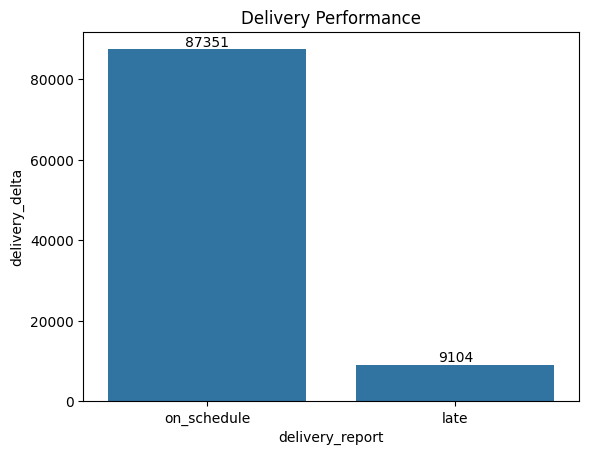

In [58]:
ax = sns.barplot(order_df_copy, x="delivery_report", y='delivery_delta', estimator="count", errorbar=None)
ax.bar_label(ax.containers[0],fontsize=10)
plt.title('Delivery Performance')

In [59]:
# merge dataframe 'order' dan 'customer'
orderxcustomer_df = order_df.merge(customer_df, how='left', on='customer_id')

In [60]:
orderxcustomer_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [61]:
orderxcustomer_df.groupby(by='customer_city').order_id.nunique().sort_values(ascending=False)

customer_city
sao paulo             15043
rio de janeiro         6600
belo horizonte         2697
brasilia               2071
curitiba               1489
                      ...  
ponto novo                1
ponto do marambaia        1
ponto belo                1
pontes gestal             1
retirolandia              1
Name: order_id, Length: 4085, dtype: int64

In [62]:
orderxcustomer_df.groupby(by='customer_state').order_id.nunique().sort_values(ascending=False)

customer_state
SP    40488
RJ    12348
MG    11351
RS     5342
PR     4923
SC     3546
BA     3256
DF     2080
ES     1995
GO     1957
PE     1593
CE     1278
PA      946
MT      886
MA      716
MS      701
PB      517
PI      476
RN      474
AL      397
SE      335
TO      274
RO      243
AM      145
AC       80
AP       67
RR       41
Name: order_id, dtype: int64

In [63]:
# merge dataframe 'order','order item' dan 'customer'
orderxcustomerxorderitem_df = orderxcustomer_df.merge(order_item_df, how = 'left', on='order_id')

In [64]:
# copy dataframe 'orderxcustomerxorderitem_df'
orderxcustomerxorderitem_df_copy = orderxcustomerxorderitem_df.copy()

In [65]:
orderxcustomerxorderitem_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110173 entries, 0 to 110172
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110173 non-null  object        
 1   customer_id                    110173 non-null  object        
 2   order_status                   110173 non-null  object        
 3   order_purchase_timestamp       110173 non-null  datetime64[ns]
 4   order_approved_at              110173 non-null  datetime64[ns]
 5   order_delivered_carrier_date   110173 non-null  datetime64[ns]
 6   order_delivered_customer_date  110173 non-null  datetime64[ns]
 7   order_estimated_delivery_date  110173 non-null  datetime64[ns]
 8   customer_unique_id             110173 non-null  object        
 9   customer_zip_code_prefix       110173 non-null  int64         
 10  customer_city                  110173 non-null  object        
 11  

In [66]:
# drop tabel yang bertipe data datetime
orderxcustomerxorderitem_df_copy_datetime_dropped = orderxcustomerxorderitem_df_copy.drop(['order_purchase_timestamp','order_approved_at',\
                                                                                           'order_delivered_carrier_date','order_delivered_customer_date',\
                                                                                           'order_estimated_delivery_date', 'shipping_limit_date'], axis=1)
orderxcustomerxorderitem_df_copy_datetime_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110173 entries, 0 to 110172
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_id                  110173 non-null  object 
 1   customer_id               110173 non-null  object 
 2   order_status              110173 non-null  object 
 3   customer_unique_id        110173 non-null  object 
 4   customer_zip_code_prefix  110173 non-null  int64  
 5   customer_city             110173 non-null  object 
 6   customer_state            110173 non-null  object 
 7   order_item_id             110173 non-null  int64  
 8   product_id                110173 non-null  object 
 9   seller_id                 110173 non-null  object 
 10  price                     110173 non-null  float64
 11  freight_value             110173 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 10.1+ MB


In [67]:
orderxcustomerxorderitem_df_copy_datetime_dropped

,order_id,customer_id,order_status,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...
110168,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,174.90,20.10
110169,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,205.99,65.02
110170,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,179.99,40.59
110171,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,179.99,40.59


In [68]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [69]:
# mendrop kolom 'product_description_lenght','product_photos_qty','product_weight_g','product_length_cm','product_height_cm' dan 'product_width_cm' pada dataframe product
product_df.drop(['product_name_lenght','product_description_lenght','product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm'], axis = 1,\
                inplace = True)

In [70]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_id             32951 non-null  object
 1   product_category_name  32341 non-null  object
dtypes: object(2)
memory usage: 515.0+ KB


In [71]:
# merge dataframe 'order', 'order item', 'customer' dan 'product'
orderxcustomerxorderitemxproduct_df = orderxcustomerxorderitem_df_copy_datetime_dropped.merge(product_df,how = 'left', on='product_id')
orderxcustomerxorderitemxproduct_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110173 entries, 0 to 110172
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_id                  110173 non-null  object 
 1   customer_id               110173 non-null  object 
 2   order_status              110173 non-null  object 
 3   customer_unique_id        110173 non-null  object 
 4   customer_zip_code_prefix  110173 non-null  int64  
 5   customer_city             110173 non-null  object 
 6   customer_state            110173 non-null  object 
 7   order_item_id             110173 non-null  int64  
 8   product_id                110173 non-null  object 
 9   seller_id                 110173 non-null  object 
 10  price                     110173 non-null  float64
 11  freight_value             110173 non-null  float64
 12  product_category_name     108637 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory us

In [72]:
# Melihat missing value pada dataframe 'orderxcustomerxorderitemxproduct_df'
missing_value = orderxcustomerxorderitemxproduct_df[orderxcustomerxorderitemxproduct_df.isnull().any(axis=1)]
missing_value

,order_id,customer_id,order_status,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,price,freight_value,product_category_name
119,bfe42c22ecbf90bc9f35cf591270b6a7,803ac05904124294f8767894d6da532b,delivered,34c58672601f2c6d29db7efd1f6bf958,38650,bonfinopolis de minas,MG,1,71225f49be70df4297892f6a5fa62171,e5a3438891c0bfdb9394643f95273d8e,27.30,15.10,NaN
206,58ac1947c1a9067b9f416cba6d844a3f,ee8e1d37f563ecc11cc4dcb4dfd794c2,delivered,5cbf29b2dcf212a6a5d864b887238c72,4842,sao paulo,SP,1,9820e04e332fc450d6fd975befc1bc28,520b493b57809f446cb0a233bb3e25c7,110.00,14.16,NaN
258,e22b71f6e4a481445ec4527cb4c405f7,1faf89c8f142db3fca6cf314c51a37b6,delivered,1268b060098ed3f22c2e7c34cc72a1a8,38240,itapagipe,MG,1,3bc5164bc7f4be77002d6651da65c98c,6cd68b3ed6d59aaa9fece558ad360c0a,22.50,11.74,NaN
296,a094215e786240fcfefb83d18036a1cd,86acfb656743da0c113d176832c9d535,delivered,f5cb81f98962f7504bef1e75579b6dff,13474,americana,SP,1,5a848e4ab52fd5445cdc07aab1c40e48,c826c40d7b19f62a09e2d7c5e7295ee2,122.99,9.06,NaN
365,6f841dde94727854eaff3f66432c80ea,a9c9532060c9d245f06526c633d2dfba,delivered,5f38cc36e507c4d880489be38964af19,27262,volta redonda,RJ,1,c600d7f13104e8db2ca2b9fa78581409,f18112da765e0971ca5d510dec322bdd,168.90,24.05,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109757,1a10e938a1c7d8e5eecc3380f71ca76b,8a81607347c25d881d995d94de6ad824,delivered,75fe53e03a8a9797acb680ce8710da8b,27264,volta redonda,RJ,1,8d39a63db6a98e40571f486e0c711cf7,c826c40d7b19f62a09e2d7c5e7295ee2,127.20,18.99,NaN
109921,e33865519137f5737444109ae8438633,64b086bdcc54458af3ea3bd838db54a5,delivered,82ffeb20040f58e6c008e4402fa6f992,1228,sao paulo,SP,1,e9cbc0910ab050cbd92fbeb051c270ea,f3da5b2ff499efb8d4a6d371d175d7dd,33.85,8.29,NaN
109928,f0dd9af88d8ef5a8e4670fbbedaf19c4,30ddb50bd22ee927ebe308ea3da60735,delivered,1d627d8a6e1e33ea8eeeb7a17d998660,11045,santos,SP,1,0c877471e35049402bca235e06cb8063,dd7ddc04e1b6c2c614352b383efe2d36,84.90,15.35,NaN
109934,272874573723eec18f23c0471927d778,48e080c8001e92ebea2b64e474f91a60,delivered,da59579685bd771fdd4f90fb50d28cd3,7240,guarulhos,SP,1,5a848e4ab52fd5445cdc07aab1c40e48,c826c40d7b19f62a09e2d7c5e7295ee2,122.99,9.06,NaN


In [73]:
orderxcustomerxorderitemxproduct_df.head(10)

,order_id,customer_id,order_status,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,price,freight_value,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,utilidades_domesticas
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,perfumaria
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,automotivo
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,27.20,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.90,8.72,papelaria
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,80bb27c7c16e8f973207a5086ab329e2,86320,congonhinhas,PR,1,060cb19345d90064d1015407193c233d,8581055ce74af1daba164fdbd55a40de,147.90,27.36,automotivo
6,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,932afa1e708222e5821dac9cd5db4cae,26525,nilopolis,RJ,1,4520766ec412348b8d4caa5e8a18c464,16090f2ca825584b5a147ab24aa30c86,59.99,15.17,automotivo
7,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,39382392765b6dc74812866ee5ee92a7,99655,faxinalzinho,RS,1,ac1789e492dcd698c5c10b97a671243a,63b9ae557efed31d1f7687917d248a8d,19.90,16.05,moveis_decoracao
8,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,299905e3934e9e181bfb2e164dd4b4f8,18075,sorocaba,SP,1,9a78fb9862b10749a117f7fc3c31f051,7c67e1448b00f6e969d365cea6b010ab,149.99,19.77,moveis_escritorio
9,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,f2a85dec752b8517b5e58a06ff3cd937,20780,rio de janeiro,RJ,1,08574b074924071f4e201e151b152b4e,001cca7ae9ae17fb1caed9dfb1094831,99.00,30.53,ferramentas_jardim


In [78]:
orderxcustomerxorderitemxproduct_df.groupby(by='product_category_name').agg({
    "product_id": "count",
    "price":  ["min", "max"]
}).sort_values(by=[("price",'min')], ascending=True)

product_id   price         
                                       count     min      max
product_category_name                                        
construcao_ferramentas_construcao        916    0.85  2300.00
beleza_saude                            9465    1.20  3124.00
papelaria                               2466    2.29  1693.00
pet_shop                                1924    2.90  2498.00
utilidades_domesticas                   6795    3.06  6735.00
...                                      ...     ...      ...
fashion_roupa_infanto_juvenil              7   39.99   110.00
moveis_colchao_e_estofado                 37   44.70   399.99
cds_dvds_musicais                         14   45.00    65.00
seguros_e_servicos                         2  100.00   183.29
pc_gamer                                   8  129.99   219.00

[73 rows x 3 columns]

In [80]:
orderxcustomerxorderitemxproduct_df.groupby(by='product_category_name').agg({
    "product_id": "count",
    "price":  ["min", "max"]
}).sort_values(by=[("price",'max')], ascending=False)

product_id   price         
                                   count     min      max
product_category_name                                    
utilidades_domesticas               6795    3.06  6735.00
pcs                                  199   34.50  6729.00
artes                                197    5.35  6499.00
eletroportateis                      657    6.50  4799.00
instrumentos_musicais                651    4.90  4399.87
...                                  ...     ...      ...
seguros_e_servicos                     2  100.00   183.29
fraldas_higiene                       37   25.00   139.89
fashion_roupa_infanto_juvenil          7   39.99   110.00
flores                                33   15.60    65.90
cds_dvds_musicais                     14   45.00    65.00

[73 rows x 3 columns]

In [81]:
orderxcustomerxorderitemxproduct_df.groupby(by='product_category_name').agg({
    "product_id": "count",
    "price": "sum"
}).sort_values(by="price", ascending=False)

,product_id,price
product_category_name,,
beleza_saude,9465,1233131.72
relogios_presentes,5857,1165898.98
cama_mesa_banho,10952,1023300.77
esporte_lazer,8428,954604.57
informatica_acessorios,7643,888613.62
...,...,...
flores,33,1110.04
casa_conforto_2,30,760.27
cds_dvds_musicais,14,730.00


In [82]:
orderxcustomerxorderitemxproduct_df.groupby(by=["customer_state", "product_category_name"]).agg({
    "product_id": "count",
    "price": "sum"
})

product_id    price
customer_state product_category_name                           
AC             artigos_de_natal                      1    69.90
               automotivo                            4   540.98
               bebes                                 3   697.84
               beleza_saude                          7  1386.58
               brinquedos                            3   234.79
...                                                ...      ...
TO             portateis_casa_forno_e_cafe           1  1999.00
               relogios_presentes                   29  4920.89
               telefonia                            21  1268.12
               telefonia_fixa                        2  1390.99
               utilidades_domesticas                13   926.17

[1362 rows x 2 columns]

In [83]:
orderxcustomerxorderitem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110173 entries, 0 to 110172
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110173 non-null  object        
 1   customer_id                    110173 non-null  object        
 2   order_status                   110173 non-null  object        
 3   order_purchase_timestamp       110173 non-null  datetime64[ns]
 4   order_approved_at              110173 non-null  datetime64[ns]
 5   order_delivered_carrier_date   110173 non-null  datetime64[ns]
 6   order_delivered_customer_date  110173 non-null  datetime64[ns]
 7   order_estimated_delivery_date  110173 non-null  datetime64[ns]
 8   customer_unique_id             110173 non-null  object        
 9   customer_zip_code_prefix       110173 non-null  int64         
 10  customer_city                  110173 non-null  object        
 11  

In [84]:
orderxcustomerxorderitemxproduct_df2 = orderxcustomerxorderitem_df.merge(product_df,how = 'left', on='product_id')
orderxcustomerxorderitemxproduct_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110173 entries, 0 to 110172
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110173 non-null  object        
 1   customer_id                    110173 non-null  object        
 2   order_status                   110173 non-null  object        
 3   order_purchase_timestamp       110173 non-null  datetime64[ns]
 4   order_approved_at              110173 non-null  datetime64[ns]
 5   order_delivered_carrier_date   110173 non-null  datetime64[ns]
 6   order_delivered_customer_date  110173 non-null  datetime64[ns]
 7   order_estimated_delivery_date  110173 non-null  datetime64[ns]
 8   customer_unique_id             110173 non-null  object        
 9   customer_zip_code_prefix       110173 non-null  int64         
 10  customer_city                  110173 non-null  object        
 11  

In [85]:
orderxcustomerxorderitemxproduct_df_drop_5datetime = orderxcustomerxorderitemxproduct_df2.drop(['order_approved_at',\
                                                        'order_delivered_carrier_date', 'order_delivered_customer_date',\
                                                          'order_estimated_delivery_date', 'shipping_limit_date', 'freight_value'], axis=1)
orderxcustomerxorderitemxproduct_df_drop_5datetime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110173 entries, 0 to 110172
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  110173 non-null  object        
 1   customer_id               110173 non-null  object        
 2   order_status              110173 non-null  object        
 3   order_purchase_timestamp  110173 non-null  datetime64[ns]
 4   customer_unique_id        110173 non-null  object        
 5   customer_zip_code_prefix  110173 non-null  int64         
 6   customer_city             110173 non-null  object        
 7   customer_state            110173 non-null  object        
 8   order_item_id             110173 non-null  int64         
 9   product_id                110173 non-null  object        
 10  seller_id                 110173 non-null  object        
 11  price                     110173 non-null  float64       
 12  pr

**Insight:**
- Harga terendah yang dijual ada pada ketegori 'construcao_ferramentas_construcao' dengan harga 0.85


## Visualization & Explanatory Analysis

In [86]:
orderxcustomerxorderitemxproduct_df_grouped_time_month = orderxcustomerxorderitemxproduct_df_drop_5datetime.resample('ME', on='order_purchase_timestamp').sum()
orderxcustomerxorderitemxproduct_df_grouped_time_month.sort_values('order_purchase_timestamp', ascending=True)

,order_id,customer_id,order_status,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,price,product_category_name
order_purchase_timestamp,,,,,,,,,,,,
2016-09-30,bfbd0f9bdef84302105ad712db648a6cbfbd0f9bdef843...,86dc2ffce2dfff336de2f386a786e57486dc2ffce2dfff...,delivereddelivereddelivered,830d5b7aaa3b6f1e9ad63703bec97d23830d5b7aaa3b6f...,43800,sao joaquim da barrasao joaquim da barrasao jo...,SPSPSP,6,5a6b04657a4c5ee34285d1e4619a96b45a6b04657a4c5e...,ecccfa2bb93b34a3bf033cc5d1dcdc69ecccfa2bb93b34...,134.97,beleza_saudebeleza_saudebeleza_saude
2016-10-31,3b697a20d9e427646d92567910af6d57be5bc2f0da14d8...,355077684019f7f60a031656bd7262b87ec40b22510fdb...,delivereddelivereddelivereddelivereddeliveredd...,32ea3bdedab835c3aa6cb68ce66565ef2f64e403852e68...,12530230,sao paulopanambiporto alegrehortolandiataubate...,SPRSRSSPSPGOMGSPSPSPPASCRNMGSPMTMTMGSPPERJESRJ...,397,3ae08df6bcbfe23586dd431c40bddbb7fd7fd78fd3cbc1...,522620dcb18a6b31cd7bdf73665113a9f09b760d23495a...,40325.11,relogios_presentesesporte_lazeresporte_lazermo...
2016-11-30,0,0,0,0,0,0,0,0,0,0,0.00,0
2016-12-31,bd50a7fe9fd97ea4b7663031a319e150,0975c3cf2e418ebfa5d1191a2dffd59d,delivered,f7b981e8a280e455ac3cbe0d5d171bd1,80030,curitiba,PR,1,f5d8f4fbc70ca2a0038b9a0010ed5cb0,48efc9d94a9834137efd9ea76b065a38,10.90,fashion_bolsas_e_acessorios
2017-01-31,ec7a019261fce44180373d45b442d78fb95a0a8bd30aec...,c24fc5f9a446b4d8262041b9c64de772ff3c6d35b4927c...,delivereddelivereddelivereddelivereddeliveredd...,f7b981e8a280e455ac3cbe0d5d171bd183e7958a94bd7f...,35376216,curitibacuritibacuritibacuritibacuritibacuriti...,PRPRPRPRPRPRPRPRPRPRPRPRPRPRPRPRPRPRPRPRPRPRPR...,1271,f5d8f4fbc70ca2a0038b9a0010ed5cb06c04a068e5ab37...,48efc9d94a9834137efd9ea76b065a3848efc9d94a9834...,111712.47,fashion_bolsas_e_acessoriosautomotivopet_shopp...
2017-02-28,0e659173ebf2a1d39e076be9bd0b287234605af753e44d...,9333fb1c5675b69afe49a9cf6b91defe3efd5061c7c8d8...,delivereddelivereddelivereddelivereddeliveredd...,13aec51202205c662b24202760e93a9213aec51202205c...,69645809,tubaraotubaraovarzea granderio de janeirojacob...,SCSCMTRJBARJMGRJMGRJSPSPMGRJSCSPMAPRSPSPPRSPSP...,2126,6f26402132b4c218396901cc4cf2804a991669e10bb13b...,3a52d63a8f9daf5a28f3626d7eb9bd286b9b80d53ba367...,232638.86,esporte_lazeresporte_lazerferramentas_jardimmo...
2017-03-31,7d0a7957897551b77224fc297e8f604631a606477f15f8...,b8936eebb611c6af9b609ed39594c33a94889e991b908b...,delivereddelivereddelivereddelivereddeliveredd...,426f0839fbb0679c6f1ef8f80cc30c66d5536cc12141c6...,104979500,cuiabaguarulhosilheussao paulobelo horizonteca...,MTSPBASPMGMGSPSPMGSPSPMGBASPSPESSPSPMGSPSPDFSP...,3402,abe6b1e401ce596ad0c493aeedb488a4078cec63541a67...,c847e075301870dd144a116762eaff9a4ebdc7e6cd6102...,359198.85,cool_stuffutilidades_domesticasperfumariabrinq...
2017-04-30,9d343b43e2a3552fdfaff5ad21a9af61e49d81cefb427d...,a0c5cbf7dae5ccd736f5c2576bccf5649133fb73714e99...,delivereddelivereddelivereddelivereddeliveredd...,c6c431ac2e6fb4433711fa86143dc446df2c418b45e799...,96062933,belo horizontesao paulobaurusao paulosao berna...,MGSPSPSPSPSPSPPRMGMGDFSPSCALSPRSMGMGRJRJTOSPGO...,2916,5e2ba75ad255ff60b1c76c5bf526ae9b3f90ef42e637c1...,f84a00e60c73a49e7e851c9bdca3a5bbd2374cbcbb3ca4...,340669.68,beleza_saudecama_mesa_banhoautomotivocama_mesa...
2017-05-31,c9dbbd1ca9411200390b157cb42ea79a73689c18cffbd6...,10fe5969e9451138c0f393cf702f84957d95f28e19204d...,delivereddelivereddelivereddelivereddeliveredd...,7118f503fd56b67980229260380b0f2af804ed90360900...,148952180,santa julianabocainanovaisjuiz de forasao paul...,MGSPSPMGSPSPDFDFRJCESCSCSPSPRJSPSPRJMGPRSPESES...,4636,9b00d5e140d71a265c6be7d132b32cd25f21301936c116...,e067ad2c1c0b48758eb1b5228bcf7a68fe2032dab1a61a...,489159.25,pet_shopperfumariabeleza_saudetelefoniabebeste...


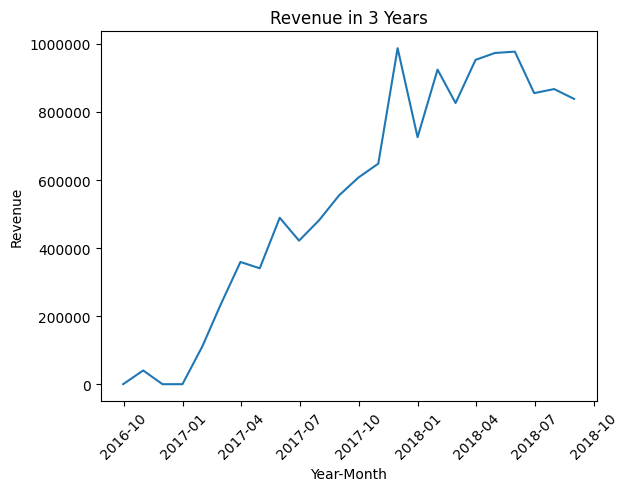

In [87]:
lp1 = sns.lineplot(
    y="price", 
    x="order_purchase_timestamp",
    data=orderxcustomerxorderitemxproduct_df_grouped_time_month,
    #fmt='d'
    #order = orderxproduct_df.sort_values('order_item_id').product_category_name
)
#lp1.set_xticklabels(lp1.get_xticklabels(),rotation = 45)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel("Year-Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.title('Revenue in 3 Years')
plt.show()

In [88]:
orderxcustomerxorderitemxproduct_df_grouped_time_month1 = orderxcustomerxorderitemxproduct_df_drop_5datetime.resample('ME', on='order_purchase_timestamp').count()
orderxcustomerxorderitemxproduct_df_grouped_time_month1.sort_values('order_purchase_timestamp', ascending=True)

,order_id,customer_id,order_status,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,price,product_category_name
order_purchase_timestamp,,,,,,,,,,,,
2016-09-30,3,3,3,3,3,3,3,3,3,3,3,3
2016-10-31,313,313,313,313,313,313,313,313,313,313,313,311
2016-11-30,0,0,0,0,0,0,0,0,0,0,0,0
2016-12-31,1,1,1,1,1,1,1,1,1,1,1,1
2017-01-31,911,911,911,911,911,911,911,911,911,911,911,899
2017-02-28,1845,1845,1845,1845,1845,1845,1845,1845,1845,1845,1845,1790
2017-03-31,2897,2897,2897,2897,2897,2897,2897,2897,2897,2897,2897,2837
2017-04-30,2569,2569,2569,2569,2569,2569,2569,2569,2569,2569,2569,2500
2017-05-31,4003,4003,4003,4003,4003,4003,4003,4003,4003,4003,4003,3912


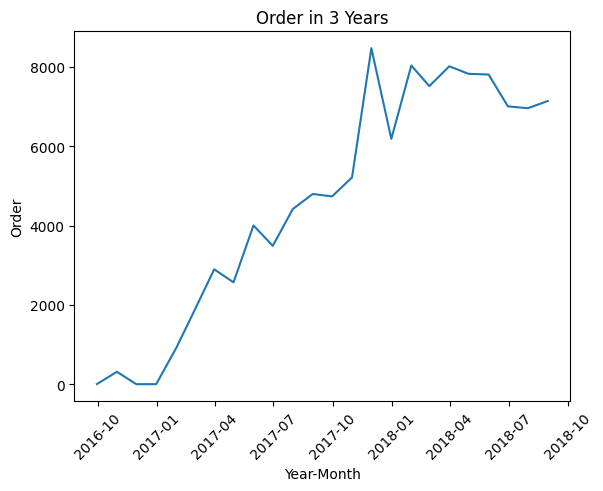

In [89]:
lp1_2 = sns.lineplot(
    y="order_id", 
    x="order_purchase_timestamp",
    data=orderxcustomerxorderitemxproduct_df_grouped_time_month1,
    #fmt='d'
    #order = orderxproduct_df.sort_values('order_item_id').product_category_name
)
#lp1.set_xticklabels(lp1.get_xticklabels(),rotation = 45)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel("Year-Month")
plt.ylabel("Order")
plt.xticks(rotation=45)
plt.title('Order in 3 Years')
plt.show()

In [90]:
orderxcustomerxorderitemxproduct_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110173 entries, 0 to 110172
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_id                  110173 non-null  object 
 1   customer_id               110173 non-null  object 
 2   order_status              110173 non-null  object 
 3   customer_unique_id        110173 non-null  object 
 4   customer_zip_code_prefix  110173 non-null  int64  
 5   customer_city             110173 non-null  object 
 6   customer_state            110173 non-null  object 
 7   order_item_id             110173 non-null  int64  
 8   product_id                110173 non-null  object 
 9   seller_id                 110173 non-null  object 
 10  price                     110173 non-null  float64
 11  freight_value             110173 non-null  float64
 12  product_category_name     108637 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory us

In [91]:
orderxcustomer_df_grouped = orderxcustomerxorderitemxproduct_df.groupby(by='customer_state').sum()
orderxcustomer_df_grouped

,order_id,customer_id,order_status,customer_unique_id,customer_zip_code_prefix,customer_city,order_item_id,product_id,seller_id,price,freight_value,product_category_name
customer_state,,,,,,,,,,,,
AC,d445a6e277eaa62900bc18d453d96d76cab041d8d606d6...,c2cd065252fa7ad04274d9d69dd9c09e888d2ebe1af2a8...,delivereddelivereddelivereddelivereddeliveredd...,e808aa0ce98f33e671bf3e5b47756564721d1092e1a646...,6362220,rio brancorio brancorio brancorio brancorio br...,114,9afaad66aca8b0c79e4f084a89c9c92babe135ae574a89...,42bde9fef835393bb8a8849cb6b7f24563ffcb71394dd8...,15930.97,3644.36,telefoniamalas_acessorioseletronicosperfumaria...
AL,9f035a4126d6f9cf43447e9b8eb6abae62a56f9bfe98de...,ac7e3d34240c0ebfc003455c2e04d10aaa0a85e355a784...,delivereddelivereddelivereddelivereddeliveredd...,cf2d4b59551f1a621e1dd518d8025d3fbfdb1f4f667634...,24432905,maceiomaceiomaceiomaceiosao jose da taperataqu...,469,362e37b5c8826ef516a607cb5f99b8f1b5e6d813290cd0...,6d66611d7c44cc30ce351abc49a68421fd386aa7bed2af...,78855.72,15316.77,esporte_lazerpapelariamoveis_decoracaobeleza_s...
AM,83ea47ad24b5fce57aa5ade0fd069c948dcdf2ba217458...,6e8a9c87724e18b7e567193cdd3e4b45a380a86d2b4633...,delivereddelivereddelivereddelivereddeliveredd...,8fe805d171f920bf0ae393368aad53161cfcda54cd798f...,11259567,humaitamanausmanausmanausmanaushumaitamanausma...,193,154e7e31ebfa092203795c972e5804a66dae4e6bc33468...,cc419e0650a3c5ba77189a1882b7556a2e13c71026e1a3...,22155.84,5429.63,beleza_saudeesporte_lazerbeleza_saudecama_mesa...
AP,40001f4b6e1a35f0b99fc4f44078ab27a3761cb6b3883a...,1690401c1e48c9526a79e72ba8c069a255df82d9ca2503...,delivereddelivereddelivereddelivereddeliveredd...,b33ab8755cd35552942225232a9a8849ac163d5daa3ed7...,5581772,macapamacapalaranjal do jarimacapamacapamacapa...,102,afeeea6271148ee1bb15173b8187c431ba5fb4ab9cd70d...,53243585a1d6dc2643021fd1853d8905562fc2f2c2863a...,13374.81,2767.00,telefoniatelefoniabeleza_saudeinformatica_aces...
BA,53cdb2fc8bc7dce0b6741e215027345183018ec114eee8...,b0830fb4747a6c6d20dea0b8c802d7ef7f8c8b9c2ae27b...,delivereddelivereddelivereddelivereddeliveredd...,af07308b275d755c9edb36a90c618231634f09f6075fe9...,162436775,barreirasfeira de santanasalvadorsalvadorluis ...,4323,595fac2a385ac33a80bd5114aec74eb8c35498fbb43588...,289cdb325fb7e7f891c38608bf9e096270a12e78e608ac...,493584.14,97553.67,perfumariatelefoniabebesbebespapelariaesporte_...
CE,60550084e6b4c0cb89a87df1f3e5ebd977e9941864fc84...,f5458ddc3545711efa883dd7ae7c44973135962ee745ef...,delivereddelivereddelivereddelivereddeliveredd...,661a5e18a28b34880ccc60112f2b8e8e00b2ca23369b68...,87808519,ibiapinaalto santoiraucubafortalezafortalezafo...,1651,9b37a918bcf2c8e1064e867cf1df4637a01d1cbb398e38...,f27e33c6d29b5138fa9967bcd445b6d5d566c37fa119d5...,219677.39,46652.57,eletronicosesporte_lazertelefoniaesporte_lazer...
DF,948097deef559c742e7ce321e5e58919f346ad4ee8f630...,8644be24d48806bc3a88fd59fb47ceb1dd5095632e3953...,delivereddelivereddelivereddelivereddeliveredd...,4ca5f90433afb5493247f0bafb583483da45a9a1df408c...,168724637,brasiliabrasiliabrasiliabrasiliabrasiliabrasil...,2756,cd935d283d47f1050c505e1c39c48b674ce99ff9dcb782...,a3a38f4affed601eb87a97788c94966770125af26c2d6d...,296498.41,49624.94,esporte_lazeresporte_lazertelefoniapapelariapa...
ES,74ebfa44a323c96a7760bd693d690a3d61988b318aaf57...,13fd7ce9f08449dec2533119379a252702731f7e9105de...,delivereddelivereddelivereddelivereddeliveredd...,6110fc2216f14d1efaa683050a262e906517822823bf50...,65190170,serravitoriacariacicavila velhacachoeiro de it...,2547,7d1fc7d682f6a5c8e47437e3540f44151f30aacc69904c...,376a891762bbdecbc02b4b6adec3fdda4a3ca9315b744c...,268643.45,49014.48,cool_stuffcama_mesa_banhocool_stuffutilidades_...
GO,47770eb9100c2d0c44946d9cf07ec65ddcb36b511fcac0...,41ce2a54c0b03bf3443c3d931a3670893b6828a50ffe54...,delivereddelivereddelivereddelivereddeliveredd...,3a653a41f6f9fc3d2a113cf8398680e8ccafc1c3f27041...,170764210,vianopolisgoianiasanto antonio do descobertosa...,3068,aa4383b373c6aca5d8797843e5594415009c09f439988b...,4869f7a5

In [126]:
orderxcustomer_df_grouped.sort_values('price',ascending=True)

,order_id,customer_id,order_status,customer_unique_id,customer_zip_code_prefix,customer_city,order_item_id,product_id,seller_id,price,freight_value,product_category_name
customer_state,,,,,,,,,,,,
RR,ecab90c9933c58908d3d6add7c6f5ae31eeaec28c1a699...,761df82feda9778854c6dafdaeb567e4e6f7cbd1504efe...,delivereddelivereddelivereddelivereddeliveredd...,1428917cd397d4f9ac0fde76dd6f22668d2fa65d968da6...,3188236,boa vistaboa vistaboa vistaboa vistaboa vistab...,51,c0db539123a403f670c50237d970b2155a848e4ab52fd5...,f7720c4fa8e3aba4546301ab80ea1f1bc826c40d7b19f6...,7057.47,1982.05,ferramentas_jardimtelefoniatelefoniainformatic...
AP,40001f4b6e1a35f0b99fc4f44078ab27a3761cb6b3883a...,1690401c1e48c9526a79e72ba8c069a255df82d9ca2503...,delivereddelivereddelivereddelivereddeliveredd...,b33ab8755cd35552942225232a9a8849ac163d5daa3ed7...,5581772,macapamacapalaranjal do jarimacapamacapamacapa...,102,afeeea6271148ee1bb15173b8187c431ba5fb4ab9cd70d...,53243585a1d6dc2643021fd1853d8905562fc2f2c2863a...,13374.81,2767.00,telefoniatelefoniabeleza_saudeinformatica_aces...
AC,d445a6e277eaa62900bc18d453d96d76cab041d8d606d6...,c2cd065252fa7ad04274d9d69dd9c09e888d2ebe1af2a8...,delivereddelivereddelivereddelivereddeliveredd...,e808aa0ce98f33e671bf3e5b47756564721d1092e1a646...,6362220,rio brancorio brancorio brancorio brancorio br...,114,9afaad66aca8b0c79e4f084a89c9c92babe135ae574a89...,42bde9fef835393bb8a8849cb6b7f24563ffcb71394dd8...,15930.97,3644.36,telefoniamalas_acessorioseletronicosperfumaria...
AM,83ea47ad24b5fce57aa5ade0fd069c948dcdf2ba217458...,6e8a9c87724e18b7e567193cdd3e4b45a380a86d2b4633...,delivereddelivereddelivereddelivereddeliveredd...,8fe805d171f920bf0ae393368aad53161cfcda54cd798f...,11259567,humaitamanausmanausmanausmanaushumaitamanausma...,193,154e7e31ebfa092203795c972e5804a66dae4e6bc33468...,cc419e0650a3c5ba77189a1882b7556a2e13c71026e1a3...,22155.84,5429.63,beleza_saudeesporte_lazerbeleza_saudecama_mesa...
RO,265f4e28ef8cf69f8445e2951bbe7343673426deedf113...,c572fd6cdd98e87ea2bc433b6da21078133cb7dc019947...,delivereddelivereddelivereddelivereddeliveredd...,3e45b1d69bfaf0b7963cbb9dd00196f7f9704cfe97e0f3...,20987088,ariquemesji-paranaariquemespresidente medicico...,317,7e0dc102074f8285580c9777f79c90cfb205c1d9481d55...,e26901d5ab434ce92fd9b5c256820a4e9fe7c6641c7997...,45682.76,11283.24,ferramentas_jardimmalas_acessoriosbeleza_saude...
TO,8563039e855156e48fccee4d611a31965691d72069359c...,5f16605299d698660e0606f7eae2d2f9a8f76d9cb0f8db...,delivereddelivereddelivereddelivereddeliveredd...,92fd8aa5948e20c43a014c44c025c5e13353f4c5877c92...,23996289,alvoradapalmaslajeadogurupiburiti do tocantins...,361,bff2010b28e8fbcff5a9db9d3fea5ac48c0fd3e89ebf51...,955fee9216a65b617aa5c0531780ce60715bbd5ba4e6b7...,48402.51,11604.86,ferramentas_jardimrelogios_presentesbeleza_sau...
SE,66e4624ae69e7dc89bd50222b59f581f66e4624ae69e7d...,684fa6da5134b9e4dab731e00011712d684fa6da5134b9...,delivereddelivereddelivereddelivereddeliveredd...,ddf60e20e6e262e2136801ce5cd628b0ddf60e20e6e262...,18449469,aracajuaracajuaracajuaracajulagartoaracajuindi...,430,b37b72d5a56f887725c2862184b8cab8b37b72d5a56f88...,db4350fd57ae30082dec7acbaacc17f9db4350fd57ae30...,56574.19,13714.94,telefoniatelefoniainformatica_acessorioseletro...
AL,9f035a4126d6f9cf43447e9b8eb6abae62a56f9bfe98de...,ac7e3d34240c0ebfc003455c2e04d10aaa0a85e355a784...,delivereddelivereddelivereddelivereddeliveredd...,cf2d4b59551f1a621e1dd518d8025d3fbfdb1f4f667634...,24432905,maceiomaceiomaceiomaceiosao jose da taperataqu...,469,362e37b5c8826ef516a607cb5f99b8f1b5e6d813290cd0...,6d66611d7c44cc30ce351abc49a68421fd386aa7bed2af...,78855.72,15316.77,esporte_lazerpapelariamoveis_decoracaobeleza_s...
RN,949d5b44dbf5de918fe9c16f97b45f8a0c6b011f8a4f87...,f88197465ea7920adcdbec7375364d82a78b75a2ad0618...,delivereddelivereddelivereddelivereddeliveredd...,7c142cf63193a1473d2e66489a9ae977198fa73f9282fb...,30886263,sao goncalo do amarantenatalnatalparnamirimnat...,580,d0b61bfb1de832b15ba9d266ca96e5b01600dcf1cea8c0...,66922902710d126a0e7d26b0

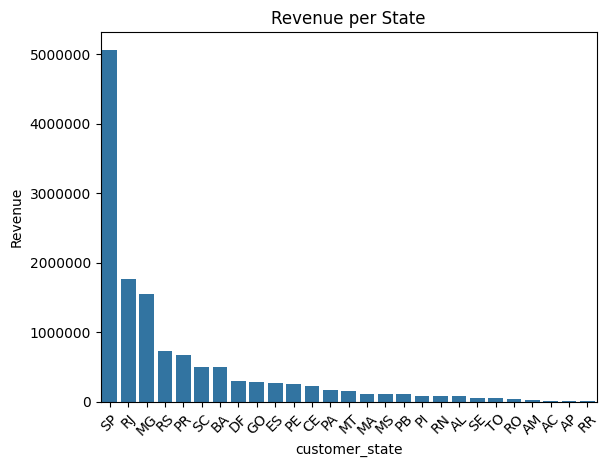

In [92]:
lp2 = sns.barplot(
    y="price", 
    x="customer_state",
    data=orderxcustomer_df_grouped.sort_values('price', ascending=False),
    #fmt='d'
    #order = orderxproduct_df.sort_values('order_item_id').product_category_name
)
#lp1.set_xticklabels(lp1.get_xticklabels(),rotation = 45)
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.title('Revenue per State')
plt.show()

In [93]:
orderxcustomer_df_grouped2 = orderxcustomerxorderitemxproduct_df.groupby(by='customer_city').sum()
orderxcustomer_df_grouped2

,order_id,customer_id,order_status,customer_unique_id,customer_zip_code_prefix,customer_state,order_item_id,product_id,seller_id,price,freight_value,product_category_name
customer_city,,,,,,,,,,,,
abadia dos dourados,50ba38c4dc467baab1ea2c8c7747934dd99e6849f7676d...,9e01f714a2b3b8962c222cf2b74c20dca23e3f9a2b656b...,delivereddelivereddelivered,e1feae9083c4c2895ddf6dc80526a85dafddf43a03a994...,115620,MGMGMG,3,418d480693f2f01e9cf4568db0346d281081ae52311daa...,12b9676b00f60f3b700e83af21824c0e4371b634e0efc0...,358.90,54.60,cool_stuffesporte_lazerlivros_interesse_geral
abadiania,3f1294f87d79b57f5d55ba7b80c3d94f,576d71ddb21b21763cfedce73b902180,delivered,8d76b559181609308fcae630ea64cd61,72940,GO,1,0a9b9a871ffaec6c0198334558a6c6a1,f9244d45189d3a3605499abddeade7d5,949.99,75.53,eletroportateis
abaete,6c12feac9a308e1382d9b19cca7f20b25525ea8ee9e615...,5371894984937a27cf40c7d20699a78608528824266cd0...,delivereddelivereddelivereddelivereddeliveredd...,2d69de392ffdb5def80917230154351d8f7f547488a056...,391820,MGMGMGMGMGMGMGMGMGMGMG,11,d47821b10559fffaefcf3e57d2b5ff763354a4e684f5e7...,0df3984f9dfb3d49ac6366acbd3bbb857a67c85e85bb2c...,1597.81,194.77,beleza_saudecool_stuffpapelariafashion_bolsas_...
abaetetuba,679783b320e587d8e1c9e0dcb2421539b3e86749e6dd7b...,305f736d2711641a06f6a9c9bd837b009cc7a2a2047164...,delivereddelivereddelivereddelivereddeliveredd...,adc650abc7894831caafbf528540e9ea27fffe110e3f28...,958160,PAPAPAPAPAPAPAPAPAPAPAPAPAPA,18,008cff0e5792219fae03e570f980b3301332f9dadde087...,530ec6109d11eaaf87999465c6afee016a8b085f816a1f...,4028.57,643.70,esporte_lazerautomotivoautomotivorelogios_pres...
abaiara,9b189f6cf2ef734a7dd0419ed3c64d9973ffc468078b5f...,f8508e9ec506a046a25f3a4a63d0c6309723d86b12bdec...,delivereddelivered,738ee47ca7799ec680527c31c73b7ef56aec5018133cf1...,126480,CECE,2,9c60e93e03989cf6e4a7da214723920d629e019a6f298a...,58f1a6197ed863543e0136bdedb3fce2c003204e1ab016...,262.90,69.25,brinquedosautomotivo
...,...,...,...,...,...,...,...,...,...,...,...,...
xinguara,e3d239a9418e145764e6f99cc02d00b0b8d147e10dd650...,462dc285a81ff498ec5e0a1925711c19029c22b31758db...,delivereddelivereddelivereddelivereddeliveredd...,62d824384528b8f24550482f6f1dd751b94783c7178812...,685556,PAPAPAPAPAPAPAPAPAPA,11,6e77b89d36e50217e6793780a8ce5c8296d04f44d30317...,ea8482cd71df3c1969d7b9473ff13abc440dd6ab244315...,1282.22,326.29,telefoniaesporte_lazeresporte_lazeresporte_laz...
xique-xique,cf165c316414f3f5ef8fe2ef84a443c39053095d6a8816...,ac734542905d1d9388c7cac46536198473fae0f59caf72...,delivereddelivereddelivered,821af681d12f9cd66b20cd1d1e7c02ced4c0286f064fdf...,142200,BABABA,3,18b0e642cbae7251e60a64aa07dd9eb971bd53a5303fc5...,85d9eb9ddc5d00ca9336a2219c97bb131900267e848cee...,179.79,50.77,informatica_acessorioscama_mesa_banhoesporte_l...
zacarias,413d21c694c928b464c2cc8d3904b2b1388a9117213936...,a30fa1104a5ff6f5d9d1d907ffb4c60987ce66add9df22...,delivereddelivered,655fb4f5aca04feecb2f00243473b2c9f43710182f400d...,30530,SPSP,2,306599a052830af3cfebe42ee7a79dde4fcb3d9a5f4871...,53e4c6e0f4312d4d2107a8c9cddf45cd8581055ce74af1...,198.80,31.05,utilidades_domesticasautomotivo


In [128]:
orderxcustomer_df_grouped2.sort_values('price', ascending=True)

,order_id,customer_id,order_status,customer_unique_id,customer_zip_code_prefix,customer_state,order_item_id,product_id,seller_id,price,freight_value,product_category_name
customer_city,,,,,,,,,,,,
polo petroquimico de triunfo,6ee722cd81ebe249b83c6351f725bbb5,9d5ff5d7ce2e4bc386bf11b9adb46a19,delivered,b501aa16c4c71c55bd43d45d112bd135,95853,RS,1,7f6a27bc434791d71f6e52b25bfc1e9e,9d7a1d34a5052409006425275ba1c2b4,5.60,15.10,papelaria
sabaudia,46a09de362c7550f138187deacc9f840,dd41ea901054c44fe4ccd11982c68796,delivered,44e7a21370ccce958a0387b528717e52,86720,PR,1,7932fcce65e2aee84d6feb4a288f9cb9,1e483cc5c76fef08d3ca05f9a8af7d01,5.90,14.52,fashion_underwear_e_moda_praia
santo antonio do rio abaixo,f2bda88ec797456b974f810a84814028,f6bc1f7a73e63de75f85218f4ee4ba74,delivered,fa78790421eaf44ffde16645c700fafe,35880,MG,1,3178ee7d2c17d1caef4955dd9bad16f6,113e3a788b935f48aad63e1c41dac1bd,6.00,18.23,artigos_de_natal
senador jose porfirio,a7be2467cdcb078b2ffdea6fd401952d,cceb2d3cf8bb8238adb90d6219d75faa,delivered,251e93d40797c3ae4b091e7f8afbcb07,68360,PA,1,bd9729be9e09e2334d76a6648475d328,3d62f86afa7c73be2628a3be1423f5a0,6.00,25.63,livros_interesse_geral
jenipapo de minas,cec79ef92819a9f1f2009e1d8cf26db8,84e58051c35730ef23c796204fe91d08,delivered,ac5a446b6eb92f59a152ae107604868f,39645,MG,1,ae8a92195eb75e94998a210eeb51693e,1d139e3a3b14025640d8df1b230aace0,7.48,15.10,esporte_lazer
...,...,...,...,...,...,...,...,...,...,...,...,...
curitiba,5447160f15621601fa9ba2b94f4906b38eeda294fab8a5...,9c338ea8093192e203bc16add78c123c6feea03756fd7e...,delivereddelivereddelivereddelivereddeliveredd...,5179541696b879141c1f0bb532f988c92ad3e60daba170...,140360764,PRPRPRPRPRPRPRPRPRPRPRPRPRPRPRPRPRPRPRPRPRPRPR...,2149,461f43be3bdf8844e65b62d9ac2c7a5adbb67791e40587...,b33e7c55446eabf8fe1a42d037ac7d6d00fc707aaaad2d...,205999.33,32460.39,relogios_presentesinformatica_acessoriosinform...
brasilia,948097deef559c742e7ce321e5e58919f346ad4ee8f630...,8644be24d48806bc3a88fd59fb47ceb1dd5095632e3953...,delivereddelivereddelivereddelivereddeliveredd...,4ca5f90433afb5493247f0bafb583483da45a9a1df408c...,167717155,DFDFDFDFDFDFDFDFDFDFDFDFDFDFDFDFDFDFDFDFDFDFDF...,2727,cd935d283d47f1050c505e1c39c48b674ce99ff9dcb782...,a3a38f4affed601eb87a97788c94966770125af26c2d6d...,295814.72,49384.33,esporte_lazeresporte_lazertelefoniapapelariapa...
belo horizonte,3bc77ce8be27211bac313c2daa402d1ab2f3763408103b...,bf141bf67fbe428d558bcf0e018eab60d0e6cb83a3fc27...,delivereddelivereddelivereddelivereddeliveredd...,c756e1910755edd88c00ac3f46baba4be1858db871ca0c...,95105008,MGMGMGMGMGMGMGMGMGMGMGMGMGMGMGMGMGMGMGMGMGMGMG...,3669,f497ba62f1d6b4f6a3a3266fa8623ad31b88c133317c3f...,6df688df543f90e9b38f4319e75a9d8854965bbe3e4f07...,346039.04,59911.47,beleza_saudecama_mesa_banhoperfumariaperfumari...


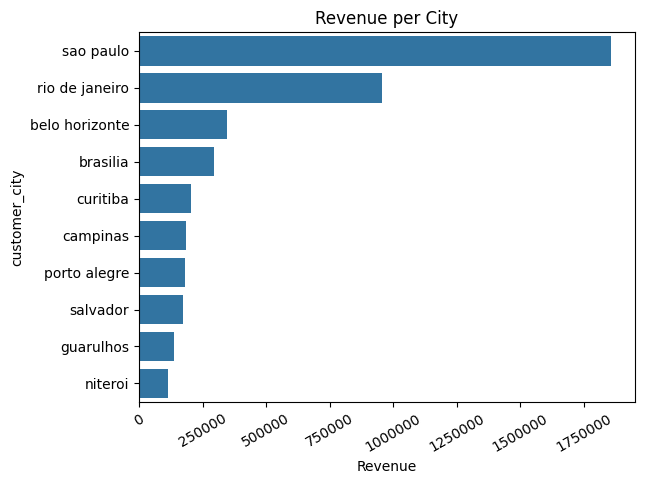

In [94]:
lp3 = sns.barplot(
    x="price", 
    y="customer_city",
    data=orderxcustomer_df_grouped2.sort_values('price', ascending=False).head(10),
    #fmt='d'
    #order = orderxproduct_df.sort_values('order_item_id').product_category_name
)
#lp1.set_xticklabels(lp1.get_xticklabels(),rotation = 45)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel("Revenue")
plt.xticks(rotation=30)
plt.title('Revenue per City')
plt.show()

C:\Users\FRANDA CHRISTIANO\AppData\Local\Temp\ipykernel_17436\821290967.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
c:\Users\FRANDA CHRISTIANO\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\FRANDA CHRISTIANO\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\FRANDA CHRISTIA

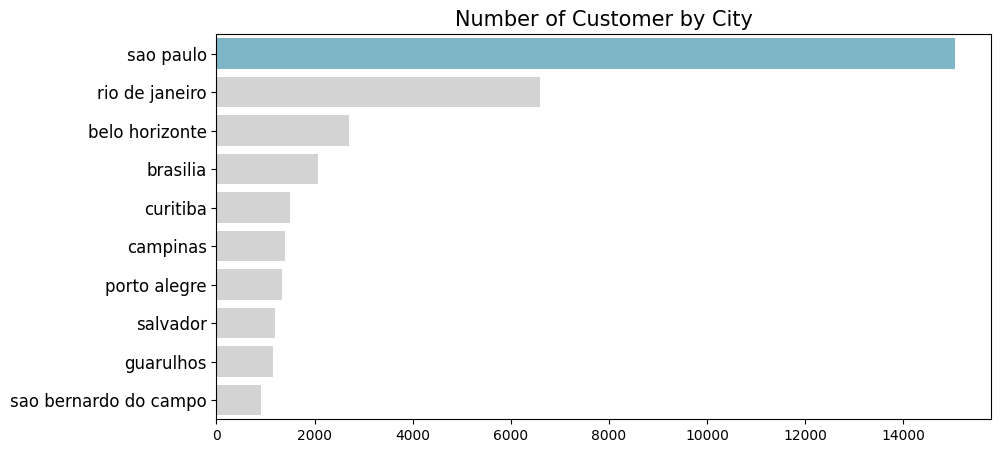

In [95]:
bycity_df = orderxcustomerxorderitemxproduct_df.groupby(by="customer_city").customer_id.nunique().reset_index()
bycity_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
#bycity_df
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3","#D3D3D3"]
sns.barplot(
    x="customer_count", 
    y="customer_city",
    data=bycity_df.sort_values(by="customer_count", ascending=False).head(10),
    palette=colors_
)
plt.title("Number of Customer by City", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

In [96]:
bystate_dfx = orderxcustomerxorderitemxproduct_df.groupby(by="customer_state").customer_id.nunique().reset_index()
bystate_dfx.head()

,customer_state,customer_id
0,AC,80
1,AL,397
2,AM,145
3,AP,67
4,BA,3256


In [97]:
bystate_dfx = orderxcustomerxorderitemxproduct_df.groupby(by="customer_state").sum().sort_values('price',ascending=False)
bystate_dfx

,order_id,customer_id,order_status,customer_unique_id,customer_zip_code_prefix,customer_city,order_item_id,product_id,seller_id,price,freight_value,product_category_name
customer_state,,,,,,,,,,,,
SP,e481f51cbdc54678b7cc49136f2d6af7ad21c59c0840e6...,9ef432eb6251297304e76186b10a928d8ab97904e6daea...,delivereddelivereddelivereddelivereddeliveredd...,7c396fd4830fd04220f754e42b4e5bff72632f0f9dd73d...,428968616,sao paulosanto andresorocabasao paulosao paulo...,56123,87285b34884572647811a353c7ac498a65266b2da20d04...,3504c0cb71d7fa48d967e0e4c94d59d92c9e548be18521...,5065805.31,701846.52,utilidades_domesticaspapelariamoveis_escritori...
RJ,6514b8ad8028c9f2cc2374ded245783fe6ce16cb79ec1d...,9bdf08b4b3b52b5526ff42d37d47f222494dded5b20131...,delivereddelivereddelivereddelivereddeliveredd...,932afa1e708222e5821dac9cd5db4caef2a85dec752b85...,338721609,nilopolisrio de janeirorio de janeirorio de ja...,16806,4520766ec412348b8d4caa5e8a18c46408574b07492407...,16090f2ca825584b5a147ab24aa30c86001cca7ae9ae17...,1759473.14,295705.63,automotivoferramentas_jardimferramentas_jardim...
MG,82566a660a982b15fb86e904c8d32918ccbabeb0b02433...,d3e3b74c766bc6214e0c830b17ee2341c77ee2d8ba1614...,delivereddelivereddelivereddelivereddeliveredd...,e97109680b052ee858d93a539597bba79c9cef121cb812...,454714519,ouro pretouberabajuiz de forajuiz de forauberl...,15276,72a97c271b2e429974398f46b93ae53089321f94e35fc6...,094ced053e257ae8cae57205592d671216090f2ca82558...,1552241.03,266358.93,perfumariaalimentosinformatica_acessoriosmalas...
RS,76c6e866289321a7c93b82b54852dc335820a110097643...,f54a9f0e6b351c431402b8461ea519992b56e94c2f66f2...,delivereddelivereddelivereddelivereddeliveredd...,39382392765b6dc74812866ee5ee92a7cc1a30280651da...,580838041,faxinalzinhoflores da cunhaporto alegreporto a...,7359,ac1789e492dcd698c5c10b97a671243a1deda1acffb44e...,63b9ae557efed31d1f7687917d248a8df52c2422904463...,728205.48,132519.26,moveis_decoracaoesporte_lazeresporte_lazerespo...
PR,a4591c265e18cb1dcee52889e2d8acc347aa4816b27ba6...,503740e9ca751ccdda7ba28e9ab8f608148348ff65384b...,delivereddelivereddelivereddelivereddeliveredd...,80bb27c7c16e8f973207a5086ab329e2db979bdfe0bbba...,475813876,congonhinhasparanavaicascavelcascavelcascavelc...,6873,060cb19345d90064d1015407193c233d1501b0033c68a3...,8581055ce74af1daba164fdbd55a40de33cbbec1e7e104...,666063.51,115645.29,automotivoeletroportateisutilidades_domesticas...
SC,116f0b09343b49556bbad5f35bee0cdf95266dbfb7e203...,3187789bec990987628d7a9beb4dd6aca166da34890074...,delivereddelivereddelivereddelivereddeliveredd...,6087cfc70fd833cf2db637a5e6e9d76b451e48381edab7...,363897045,imbitubablumenaujoinvilleirineopolisitajaiblum...,4989,a47295965bd091207681b541b26e40a5bb7181410b4e02...,ea8482cd71df3c1969d7b9473ff13abc855668e0971d4d...,507012.13,88115.65,telefoniabebesalimentoscama_mesa_banhorelogios...
BA,53cdb2fc8bc7dce0b6741e215027345183018ec114eee8...,b0830fb4747a6c6d20dea0b8c802d7ef7f8c8b9c2ae27b...,delivereddelivereddelivereddelivereddeliveredd...,af07308b275d755c9edb36a90c618231634f09f6075fe9...,162436775,barreirasfeira de santanasalvadorsalvadorluis ...,4323,595fac2a385ac33a80bd5114aec74eb8c35498fbb43588...,289cdb325fb7e7f891c38608bf9e096270a12e78e608ac...,493584.14,97553.67,perfumariatelefoniabebesbebespapelariaesporte_...
DF,948097deef559c742e7ce321e5e58919f346ad4ee8f630...,8644be24d48806bc3a88fd59fb47ceb1dd5095632e3953...,delivereddelivereddelivereddelivereddeliveredd...,4ca5f90433afb5493247f0bafb583483da45a9a1df408c...,168724637,brasiliabrasiliabrasiliabrasiliabrasiliabrasil...,2756,cd935d283d47f1050c505e1c39c48b674ce99ff9dcb782...,a3a38f4affed601eb87a97788c94966770125af26c2d6d...,296498.41,49624.94,esporte_lazeresporte_lazertelefoniapapelariapa...
GO,47770eb9100c2d0c44946d9cf07ec65ddcb36b511fcac0...,41ce2a54c0b03bf3443c3d931a3670893b6828a50ffe54...,delivereddelivereddelivereddelivereddeliveredd...,3a653a41f6f9fc3d2a113cf8398680e8ccafc1c3f27041...,170764210,vianopolisgoianiasanto antonio do descobertosa...,3068,aa4383b373c6aca5d8797843e559

C:\Users\FRANDA CHRISTIANO\AppData\Local\Temp\ipykernel_17436\2306429642.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
c:\Users\FRANDA CHRISTIANO\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\FRANDA CHRISTIANO\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\FRANDA CHRISTI

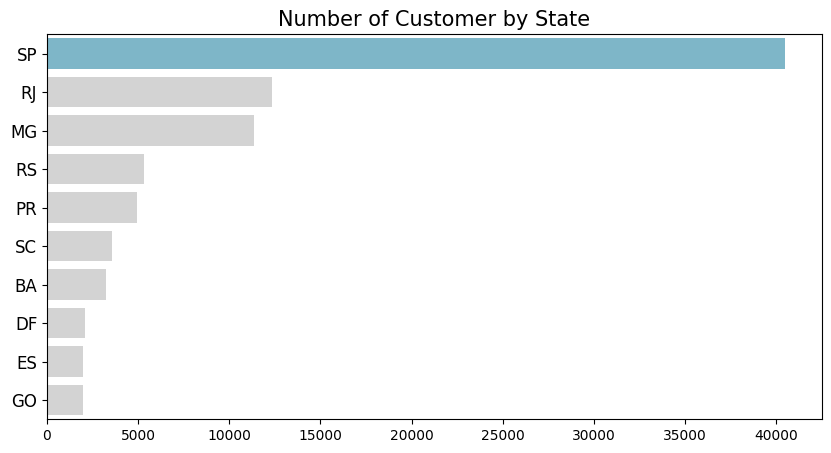

In [98]:
bystate_df = orderxcustomerxorderitemxproduct_df.groupby(by="customer_state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
#bystate_df
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3","#D3D3D3"]
sns.barplot(
    x="customer_count", 
    y="customer_state",
    data=bystate_df.sort_values(by="customer_count", ascending=False).head(10),
    palette=colors_
)
plt.title("Number of Customer by State", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

In [99]:
orderxcustomerxorderitemxproduct_df[orderxcustomerxorderitemxproduct_df.order_item_id > 21]

,order_id,customer_id,order_status,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,price,freight_value,product_category_name


In [100]:
orderxcustomerxorderitemxproduct_df.value_counts('order_item_id')

order_item_id
1     96455
2      9634
3      2243
4       937
5       442
6       249
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
16        3
17        3
18        3
19        3
20        3
21        1
Name: count, dtype: int64

In [101]:
orderxcustomerxorderitemxproduct_df.value_counts('order_id')

order_id
8272b63d03f5f79c56e9e4120aec44ef    21
1b15974a0141d54e36626dca3fdc731a    20
ab14fdcfbe524636d65ee38360e22ce8    20
9ef13efd6949e4573a18964dd1bbe7f5    15
428a2f660dc84138d969ccd69a0ab6d5    15
                                    ..
5a0df53f2e4268aa5a298c50838ccb7c     1
5a0d3e375b4f44ea40854520a34cb7b4     1
5a0c5e6a4fb3e680d5a9664cea3314c5     1
5a0aef62fed458de537f3edb8501befd     1
fffe41c64501cc87c801fd61db3f6244     1
Name: count, Length: 96455, dtype: int64

In [102]:
orderxcustomerxorderitemxproduct_df[orderxcustomerxorderitemxproduct_df.order_id == '8272b63d03f5f79c56e9e4120aec44ef']

,order_id,customer_id,order_status,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,price,freight_value,product_category_name
98302,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,1,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,1.2,7.89,beleza_saude
98303,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,2,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,1.2,7.89,beleza_saude
98304,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,3,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,1.2,7.89,beleza_saude
98305,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,1.2,7.89,beleza_saude
98306,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,5,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,1.2,7.89,beleza_saude
98307,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,6,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,1.2,7.89,beleza_saude
98308,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,7,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,1.2,7.89,beleza_saude
98309,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,1.2,7.89,beleza_saude
98310,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,9,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,1.2,7.89,beleza_saude
98311,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,10,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,1.2,7.89,beleza_saude


In [103]:
orderxcustomerxorderitemxproduct_df[orderxcustomerxorderitemxproduct_df.order_id == '1b15974a0141d54e36626dca3fdc731a']

,order_id,customer_id,order_status,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,price,freight_value,product_category_name
96213,1b15974a0141d54e36626dca3fdc731a,be1b70680b9f9694d8c70f41fa3dc92b,delivered,c402f431464c72e27330a67f7b94d4fb,3029,sao paulo,SP,1,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,100.0,10.12,informatica_acessorios
96214,1b15974a0141d54e36626dca3fdc731a,be1b70680b9f9694d8c70f41fa3dc92b,delivered,c402f431464c72e27330a67f7b94d4fb,3029,sao paulo,SP,2,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,100.0,10.12,informatica_acessorios
96215,1b15974a0141d54e36626dca3fdc731a,be1b70680b9f9694d8c70f41fa3dc92b,delivered,c402f431464c72e27330a67f7b94d4fb,3029,sao paulo,SP,3,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,100.0,10.12,informatica_acessorios
96216,1b15974a0141d54e36626dca3fdc731a,be1b70680b9f9694d8c70f41fa3dc92b,delivered,c402f431464c72e27330a67f7b94d4fb,3029,sao paulo,SP,4,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,100.0,10.12,informatica_acessorios
96217,1b15974a0141d54e36626dca3fdc731a,be1b70680b9f9694d8c70f41fa3dc92b,delivered,c402f431464c72e27330a67f7b94d4fb,3029,sao paulo,SP,5,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,100.0,10.12,informatica_acessorios
96218,1b15974a0141d54e36626dca3fdc731a,be1b70680b9f9694d8c70f41fa3dc92b,delivered,c402f431464c72e27330a67f7b94d4fb,3029,sao paulo,SP,6,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,100.0,10.12,informatica_acessorios
96219,1b15974a0141d54e36626dca3fdc731a,be1b70680b9f9694d8c70f41fa3dc92b,delivered,c402f431464c72e27330a67f7b94d4fb,3029,sao paulo,SP,7,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,100.0,10.12,informatica_acessorios
96220,1b15974a0141d54e36626dca3fdc731a,be1b70680b9f9694d8c70f41fa3dc92b,delivered,c402f431464c72e27330a67f7b94d4fb,3029,sao paulo,SP,8,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,100.0,10.12,informatica_acessorios
96221,1b15974a0141d54e36626dca3fdc731a,be1b70680b9f9694d8c70f41fa3dc92b,delivered,c402f431464c72e27330a67f7b94d4fb,3029,sao paulo,SP,9,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,100.0,10.12,informatica_acessorios
96222,1b15974a0141d54e36626dca3fdc731a,be1b70680b9f9694d8c70f41fa3dc92b,delivered,c402f431464c72e27330a67f7b94d4fb,3029,sao paulo,SP,10,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,100.0,10.12,informatica_acessorios


In [104]:
orderxcustomerxorderitemxproduct_df[orderxcustomerxorderitemxproduct_df.product_id == 'ee3d532c8a438679776d222e997606b3']

,order_id,customer_id,order_status,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,price,freight_value,product_category_name
6845,07711b948fc93b9294d8b5832d0f0a83,65f05162299b92d62d60d74b830dcc97,delivered,945c243464dad8e6b0d9d04ac9a03b7f,1120,sao paulo,SP,1,ee3d532c8a438679776d222e997606b3,f457c46070d02cadd8a68551231220dd,100.0,12.83,informatica_acessorios
12658,9561fdb9089a36bb1e9c58c334053eda,aaf2642dd99945833bc3cd3531fc125e,delivered,31b0f587f0c7b541c511988575c67cb6,88803,criciuma,SC,1,ee3d532c8a438679776d222e997606b3,f457c46070d02cadd8a68551231220dd,100.0,15.45,informatica_acessorios
12659,9561fdb9089a36bb1e9c58c334053eda,aaf2642dd99945833bc3cd3531fc125e,delivered,31b0f587f0c7b541c511988575c67cb6,88803,criciuma,SC,2,ee3d532c8a438679776d222e997606b3,f457c46070d02cadd8a68551231220dd,100.0,15.45,informatica_acessorios
23919,c60c1ff560443153d7f50771e5fe9b92,a2dec8f3303859110de7fa39ea593b45,delivered,d1dec495287c9d8611b5fc1938a07acf,29101,vila velha,ES,1,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,100.0,16.46,informatica_acessorios
66132,ca376f8f4042e61688af8cfd32d4e80e,b7f5174046bcdba1e99c45d5227ada9e,delivered,4f702b8f49f94571f343fddebd29fa3c,36884,muriae,MG,1,ee3d532c8a438679776d222e997606b3,f457c46070d02cadd8a68551231220dd,99.9,17.14,informatica_acessorios
66133,ca376f8f4042e61688af8cfd32d4e80e,b7f5174046bcdba1e99c45d5227ada9e,delivered,4f702b8f49f94571f343fddebd29fa3c,36884,muriae,MG,2,ee3d532c8a438679776d222e997606b3,f457c46070d02cadd8a68551231220dd,99.9,17.14,informatica_acessorios
96213,1b15974a0141d54e36626dca3fdc731a,be1b70680b9f9694d8c70f41fa3dc92b,delivered,c402f431464c72e27330a67f7b94d4fb,3029,sao paulo,SP,1,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,100.0,10.12,informatica_acessorios
96214,1b15974a0141d54e36626dca3fdc731a,be1b70680b9f9694d8c70f41fa3dc92b,delivered,c402f431464c72e27330a67f7b94d4fb,3029,sao paulo,SP,2,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,100.0,10.12,informatica_acessorios
96215,1b15974a0141d54e36626dca3fdc731a,be1b70680b9f9694d8c70f41fa3dc92b,delivered,c402f431464c72e27330a67f7b94d4fb,3029,sao paulo,SP,3,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,100.0,10.12,informatica_acessorios
96216,1b15974a0141d54e36626dca3fdc731a,be1b70680b9f9694d8c70f41fa3dc92b,delivered,c402f431464c72e27330a67f7b94d4fb,3029,sao paulo,SP,4,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,100.0,10.12,informatica_acessorios


In [105]:
orderxcustomerxorderitemxproduct_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110173 entries, 0 to 110172
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_id                  110173 non-null  object 
 1   customer_id               110173 non-null  object 
 2   order_status              110173 non-null  object 
 3   customer_unique_id        110173 non-null  object 
 4   customer_zip_code_prefix  110173 non-null  int64  
 5   customer_city             110173 non-null  object 
 6   customer_state            110173 non-null  object 
 7   order_item_id             110173 non-null  int64  
 8   product_id                110173 non-null  object 
 9   seller_id                 110173 non-null  object 
 10  price                     110173 non-null  float64
 11  freight_value             110173 non-null  float64
 12  product_category_name     108637 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory us

In [106]:
orderxcustomerxorderitemxproduct_df_copy_3 = orderxcustomerxorderitemxproduct_df.copy()

In [107]:
orderxcustomerxorderitemxproduct_df_copy_3[orderxcustomerxorderitemxproduct_df_copy_3.product_id == 'ee3d532c8a438679776d222e997606b3']

,order_id,customer_id,order_status,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,price,freight_value,product_category_name
6845,07711b948fc93b9294d8b5832d0f0a83,65f05162299b92d62d60d74b830dcc97,delivered,945c243464dad8e6b0d9d04ac9a03b7f,1120,sao paulo,SP,1,ee3d532c8a438679776d222e997606b3,f457c46070d02cadd8a68551231220dd,100.0,12.83,informatica_acessorios
12658,9561fdb9089a36bb1e9c58c334053eda,aaf2642dd99945833bc3cd3531fc125e,delivered,31b0f587f0c7b541c511988575c67cb6,88803,criciuma,SC,1,ee3d532c8a438679776d222e997606b3,f457c46070d02cadd8a68551231220dd,100.0,15.45,informatica_acessorios
12659,9561fdb9089a36bb1e9c58c334053eda,aaf2642dd99945833bc3cd3531fc125e,delivered,31b0f587f0c7b541c511988575c67cb6,88803,criciuma,SC,2,ee3d532c8a438679776d222e997606b3,f457c46070d02cadd8a68551231220dd,100.0,15.45,informatica_acessorios
23919,c60c1ff560443153d7f50771e5fe9b92,a2dec8f3303859110de7fa39ea593b45,delivered,d1dec495287c9d8611b5fc1938a07acf,29101,vila velha,ES,1,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,100.0,16.46,informatica_acessorios
66132,ca376f8f4042e61688af8cfd32d4e80e,b7f5174046bcdba1e99c45d5227ada9e,delivered,4f702b8f49f94571f343fddebd29fa3c,36884,muriae,MG,1,ee3d532c8a438679776d222e997606b3,f457c46070d02cadd8a68551231220dd,99.9,17.14,informatica_acessorios
66133,ca376f8f4042e61688af8cfd32d4e80e,b7f5174046bcdba1e99c45d5227ada9e,delivered,4f702b8f49f94571f343fddebd29fa3c,36884,muriae,MG,2,ee3d532c8a438679776d222e997606b3,f457c46070d02cadd8a68551231220dd,99.9,17.14,informatica_acessorios
96213,1b15974a0141d54e36626dca3fdc731a,be1b70680b9f9694d8c70f41fa3dc92b,delivered,c402f431464c72e27330a67f7b94d4fb,3029,sao paulo,SP,1,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,100.0,10.12,informatica_acessorios
96214,1b15974a0141d54e36626dca3fdc731a,be1b70680b9f9694d8c70f41fa3dc92b,delivered,c402f431464c72e27330a67f7b94d4fb,3029,sao paulo,SP,2,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,100.0,10.12,informatica_acessorios
96215,1b15974a0141d54e36626dca3fdc731a,be1b70680b9f9694d8c70f41fa3dc92b,delivered,c402f431464c72e27330a67f7b94d4fb,3029,sao paulo,SP,3,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,100.0,10.12,informatica_acessorios
96216,1b15974a0141d54e36626dca3fdc731a,be1b70680b9f9694d8c70f41fa3dc92b,delivered,c402f431464c72e27330a67f7b94d4fb,3029,sao paulo,SP,4,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,100.0,10.12,informatica_acessorios


In [108]:
orderxcustomerxorderitemxproduct_df_copy_3[orderxcustomerxorderitemxproduct_df_copy_3.order_item_id == 20]

,order_id,customer_id,order_status,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,price,freight_value,product_category_name
96232,1b15974a0141d54e36626dca3fdc731a,be1b70680b9f9694d8c70f41fa3dc92b,delivered,c402f431464c72e27330a67f7b94d4fb,3029,sao paulo,SP,20,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,100.0,10.12,informatica_acessorios
98321,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,20,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,1.2,7.89,beleza_saude
104151,ab14fdcfbe524636d65ee38360e22ce8,bd5d39761aa56689a265d95d8d32b8be,delivered,698e1cf81d01a3d389d96145f7fa6df8,74825,goiania,GO,20,9571759451b1d780ee7c15012ea109d4,ce27a3cc3c8cc1ea79d11e561e9bebb6,98.7,14.44,automotivo


In [109]:
orderxcustomerxorderitemxproduct_df[orderxcustomerxorderitemxproduct_df.order_id == '8272b63d03f5f79c56e9e4120aec44ef'].tail(2)

,order_id,customer_id,order_status,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,price,freight_value,product_category_name
98321,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,20,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,1.2,7.89,beleza_saude
98322,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,21,79ce45dbc2ea29b22b5a261bbb7b7ee7,2709af9587499e95e803a6498a5a56e9,7.8,6.57,beleza_saude


In [110]:
orderxcustomerxorderitemxproduct_df_copy_3.drop_duplicates(subset=['customer_id','customer_unique_id','customer_zip_code_prefix','customer_city','customer_state'],\
                                                            keep='last', inplace= True)

In [111]:
orderxcustomerxorderitemxproduct_df_copy_3.value_counts('order_item_id')

order_item_id
1     86821
2      7391
3      1306
4       495
5       193
6       191
7        22
8         8
10        8
12        5
11        4
9         3
14        2
15        2
20        2
13        1
21        1
Name: count, dtype: int64

In [112]:
orderxcustomerxorderitemxproduct_df.groupby(['order_item_id','order_id']).head()

,order_id,customer_id,order_status,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,price,freight_value,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,utilidades_domesticas
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,perfumaria
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,automotivo
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,27.20,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.90,8.72,papelaria
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110168,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,174.90,20.10,bebes
110169,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,205.99,65.02,eletrodomesticos_2
110170,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,179.99,40.59,informatica_acessorios
110171,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,179.99,40.59,informatica_acessorios


In [113]:
orderxcustomerxorderitemxproduct_df_copy_3.head()

,order_id,customer_id,order_status,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,price,freight_value,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,utilidades_domesticas
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,perfumaria
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,automotivo
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,27.20,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.90,8.72,papelaria


In [114]:
bycategorydfx = orderxcustomerxorderitemxproduct_df_copy_3.groupby(by="product_category_name").customer_id.nunique().reset_index()
bycategorydfx

,product_category_name,customer_id
0,agro_industria_e_comercio,177
1,alimentos,437
2,alimentos_bebidas,220
3,artes,192
4,artes_e_artesanato,22
...,...,...
68,sinalizacao_e_seguranca,137
69,tablets_impressao_imagem,78
70,telefonia,4082
71,telefonia_fixa,210


In [115]:
bycategorydfx2 = orderxcustomerxorderitemxproduct_df_copy_3.groupby(by="product_category_name").sum()
bycategorydfx2

,order_id,customer_id,order_status,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,price,freight_value
product_category_name,,,,,,,,,,,,
agro_industria_e_comercio,ee990334acb0ff9333b01afa465f3006f09d0203a51785...,a8331c35b57d8fe09e8df1c06509de2990abf5b0ac7c7b...,delivereddelivereddelivereddelivereddeliveredd...,5e965d35ef2083367ff713df75fa6f16e048d4f04bde3e...,5821619,porto alegre do nortenaviraibraganca paulistas...,MTMSSPSPSPMSPRBAMGPRSPPEPRSPRJSPMGPESPMGSPSPMG...,206,672e757f331900b9deea127a2a7b79fda0fe1efb855f3e...,e59aa562b9f8076dd550fcddf0e73491ef506c96320abe...,62500.31,4965.90
alimentos,ccbabeb0b02433bd0fcbac46e70339f2fdf128b3630c21...,c77ee2d8ba1614a4d489a44166894938a9d37ddc8ba4d9...,delivereddelivereddelivereddelivereddeliveredd...,9c9cef121cb812cb301babddc2d8331e3c0402bcc3ec3b...,12573295,uberabajoinvillecuritibabelo horizontesao jose...,MGSCPRMGSPBAESSPRJSPPRSPSPMSSPSPSPSPSPMGSPPEBA...,499,89321f94e35fc6d7903d36f74e351d4089321f94e35fc6...,16090f2ca825584b5a147ab24aa30c8616090f2ca82558...,26179.93,6321.68
alimentos_bebidas,7ce20b22753ccc86fdb3b6f7efefcc75bf4f937c279d6f...,738612606cc6f7e646b915359c71ee4c24fc6ae1036318...,delivereddelivereddelivereddelivereddeliveredd...,a2eefe752c732b4960a85852029a89e2f6139ab3e9e910...,6012657,salvadorrio do antoniorio de janeirosao paulos...,BABARJSPSPRJPRSPSPPRSPSPPRESSPSPSPSPSPCEDFSPPI...,272,a54244559e62c8ef2939e52189d65d4c54b755678728b8...,282f23a9769b2690c5dda22e316f9941a3dd39f583bc80...,13321.05,3677.21
artes,a890088df39d4c062a0708152703478491051e0aea46cd...,42532fb94eca7866bb4915e5cd46300ba57c6bea98b5c5...,delivereddelivereddelivereddelivereddeliveredd...,4d44daa2056990a8c1cb947a19c626b03e9694dfd41149...,5968877,carapicuibavolta redondaribeirao pretosao paul...,SPRJSPSPRSSPSPSPSPRJSPSPPRSPSPMGSPSPSPSPPBSPMG...,197,4fe644d766c7566dbc46fb851363cb3b4fe644d766c756...,c31eff8334d6b3047ed34bebd4d62c36c31eff8334d6b3...,23323.97,3732.39
artes_e_artesanato,99496f27b38d83724e8dea944a320b441b546846285271...,13fb43880f01c5169ed9b4fedf1228236fde8954a5343c...,delivereddelivereddelivereddelivereddeliveredd...,8eb5eca7b6879807fb801224555d42313cc9db37d3df6c...,529657,valinhosfrancisco badarocarmo do rio clarosant...,SPMGMGSPSPSCSPSPMGDFSPSPMGSPSPSPSPMGSPMGSPSP,24,189d6b9a380642d0ee2245277cc9b2f208c5c3d4718453...,0ddefe3c7a032b91f4e25b9c3a08fca11caf283236cd69...,1785.21,343.59
...,...,...,...,...,...,...,...,...,...,...,...,...
sinalizacao_e_seguranca,176ada94dcc6f5fa6091d19a9d1fffdeb4a1c1abe13b0e...,2102760f9941764d52d99011d33811c981aef10a9af8f9...,delivereddelivereddelivereddelivereddeliveredd...,ce2086a9fea4ca521c5cec07361ff2d625448c9f3f3de9...,4644869,chapecosao paulocampinaslaranjeiras do suliuna...,SCSPSPPRESSPSPRJSPRJSEBASPRNSCSPSPMGRSSPBASPPE...,196,107bf5aa8cee35a9fec5e0bf1fd5e1cd150c699262a053...,2c9e548be18521d1c43cde1c582c6de8cd68562d3f4487...,14885.24,3549.67
tablets_impressao_imagem,0917636d789ce3b3eac37895935af5c2cf439d61252ef5...,fcba45767e1f02cc6c09f78e21e4e643aee0e70971aa92...,delivereddelivereddelivereddelivereddeliveredd...,4829d76fd44a6f080411fdd7d81df23eba1f5988dec5d5...,2587043,serrasao pauloserravalinhoscampos dos goytacaz...,ESSPESSPRJCESPPRSPSPMGMGPAGORJMTSPMGMGMABAMTSP...,84,6bbe55cf8f85c87b6eebb775a53402f434dabb8af33b37...,0db783cfcd3b73998abc6e10e59a102fe62b2d6ac10570...,7117.71,1161.96
telefonia,116f0b09343b49556bbad5f35bee0cdf83018ec114eee8...,3187789bec990987628d7a9beb4dd6ac7f8c8b9c2ae27b...,delivereddelivereddelivereddelivereddeliveredd...,6087cfc70fd833cf2db637a5e6e9d76b634f09f6075fe9...,162188091,imbitubafeira de santanaaracajuuberlandiabrasi...,SCBASEMGDFSPSPPASPMGMTSPAPMGCEBASPPESPBAESSPES...,4439,a47295965bd091207681b541b26e40a5c35498fbb43588...,ea8482cd71df3c1969d7b9473ff13abc70a12e78e608ac...,288434.55,63944.25


In [116]:
bycategorydfy = orderxcustomerxorderitemxproduct_df_copy_3.groupby(by="product_category_name").nunique().reset_index().head(25).sort_values('customer_id',ascending=False)
bycategorydfy

,product_category_name,order_id,customer_id,order_status,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,price,freight_value
13,cama_mesa_banho,9178,9178,1,8919,5333,1459,27,9,2796,185,836,2007
11,beleza_saude,8615,8615,1,8468,5472,1498,27,7,2344,476,1234,2078
8,automotivo,3784,3784,1,3743,3007,1052,27,7,1806,365,834,1497
12,brinquedos,3778,3778,1,3740,2845,888,26,6,1346,239,624,1329
9,bebes,2760,2760,1,2736,2237,746,26,7,870,238,503,1116
20,consoles_games,1014,1014,1,1010,933,377,26,5,298,81,271,434
21,construcao_ferramentas_construcao,730,730,1,726,693,311,21,8,375,122,325,481
16,casa_construcao,474,474,1,474,455,245,23,6,209,66,163,306
1,alimentos,437,437,1,432,425,192,21,6,77,55,111,170
14,casa_conforto,363,363,1,362,346,193,22,5,107,19,57,185


In [117]:
bycategorydfy = orderxcustomerxorderitemxproduct_df_copy_3.groupby(by="product_category_name").nunique().reset_index().head(25).sort_values('customer_id',ascending=False)
bycategorydfy

,product_category_name,order_id,customer_id,order_status,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,price,freight_value
13,cama_mesa_banho,9178,9178,1,8919,5333,1459,27,9,2796,185,836,2007
11,beleza_saude,8615,8615,1,8468,5472,1498,27,7,2344,476,1234,2078
8,automotivo,3784,3784,1,3743,3007,1052,27,7,1806,365,834,1497
12,brinquedos,3778,3778,1,3740,2845,888,26,6,1346,239,624,1329
9,bebes,2760,2760,1,2736,2237,746,26,7,870,238,503,1116
20,consoles_games,1014,1014,1,1010,933,377,26,5,298,81,271,434
21,construcao_ferramentas_construcao,730,730,1,726,693,311,21,8,375,122,325,481
16,casa_construcao,474,474,1,474,455,245,23,6,209,66,163,306
1,alimentos,437,437,1,432,425,192,21,6,77,55,111,170
14,casa_conforto,363,363,1,362,346,193,22,5,107,19,57,185


C:\Users\FRANDA CHRISTIANO\AppData\Local\Temp\ipykernel_17436\2858123169.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
c:\Users\FRANDA CHRISTIANO\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\FRANDA CHRISTIANO\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\FRANDA CHRISTI

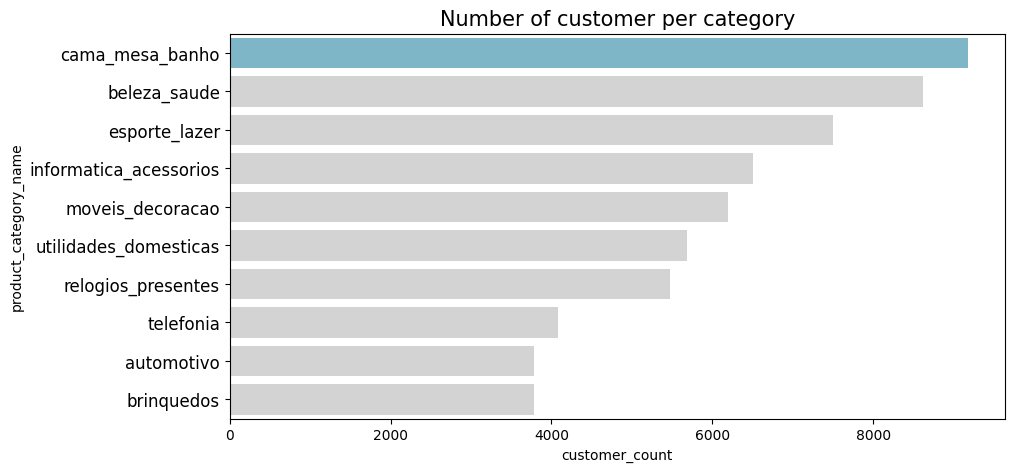

In [118]:
bycategorydf = orderxcustomerxorderitemxproduct_df_copy_3.groupby(by="product_category_name").nunique().reset_index()
bycategorydf.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3","#D3D3D3"]
sns.barplot(
    x="customer_count", 
    y="product_category_name",
    data=bycategorydf.sort_values(by="customer_count", ascending=False).head(10),
    palette=colors_
)
plt.title("Number of customer per category", loc="center", fontsize=15)
plt.ylabel('product_category_name')
plt.xlabel('customer_count')
plt.tick_params(axis='y', labelsize=12)
plt.show()

C:\Users\FRANDA CHRISTIANO\AppData\Local\Temp\ipykernel_17436\3657151615.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  lp4 = sns.barplot(
c:\Users\FRANDA CHRISTIANO\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\FRANDA CHRISTIANO\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\FRANDA C

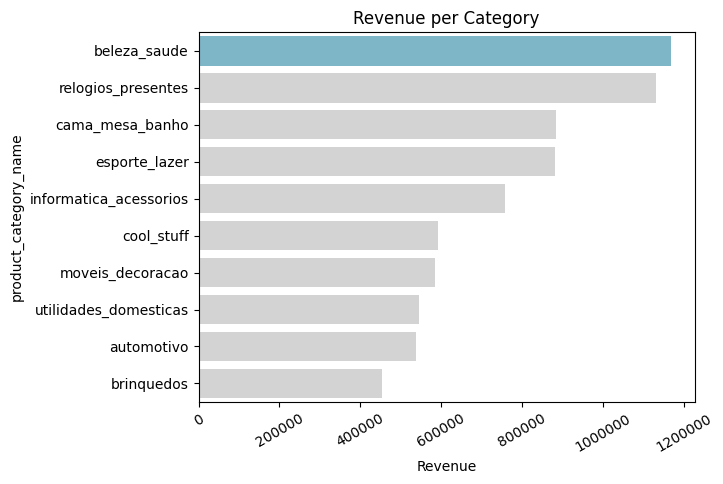

In [119]:
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3","#D3D3D3"]
lp4 = sns.barplot(
    x="price", 
    y="product_category_name",
    data=orderxcustomerxorderitemxproduct_df_copy_3.groupby(by="product_category_name").sum().sort_values('price', ascending=False).head(10),
    #fmt='d'
    #order = orderxproduct_df.sort_values('order_item_id').product_category_name
    palette=colors_
)
#lp1.set_xticklabels(lp1.get_xticklabels(),rotation = 45)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel("Revenue")
plt.xticks(rotation=30)
plt.title('Revenue per Category')
plt.show()

C:\Users\FRANDA CHRISTIANO\AppData\Local\Temp\ipykernel_17436\3221958015.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  lp5 = sns.barplot(
c:\Users\FRANDA CHRISTIANO\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\FRANDA CHRISTIANO\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\FRANDA C

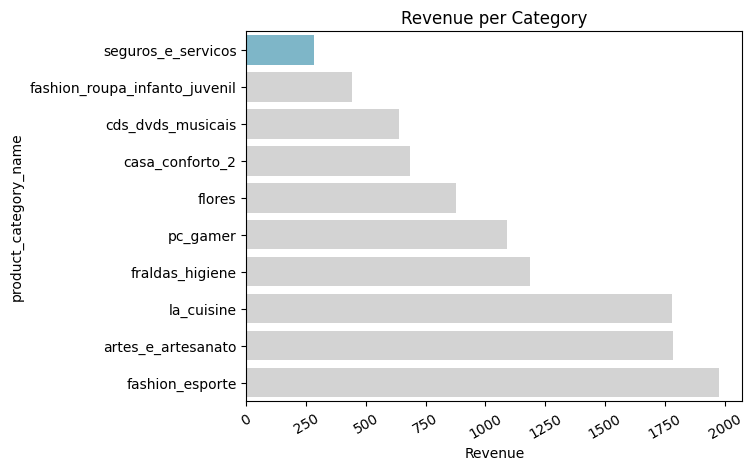

In [120]:
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3","#D3D3D3"]
lp5 = sns.barplot(
    x="price", 
    y="product_category_name",
    data=orderxcustomerxorderitemxproduct_df_copy_3.groupby(by="product_category_name").sum().sort_values('price', ascending=True).head(10),
    #fmt='d'
    #order = orderxproduct_df.sort_values('order_item_id').product_category_name
    palette=colors_
)
#lp1.set_xticklabels(lp1.get_xticklabels(),rotation = 45)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel("Revenue")
plt.xticks(rotation=30)
plt.title('Revenue per Category')
plt.show()

In [121]:
orderxcustomerxorderitemxproduct_df_copy_3.groupby(by="product_category_name").price.sum().sort_values(ascending=True)

product_category_name
seguros_e_servicos                   283.29
fashion_roupa_infanto_juvenil        439.97
cds_dvds_musicais                    640.00
casa_conforto_2                      682.87
flores                               876.24
                                    ...    
informatica_acessorios            758092.87
esporte_lazer                     880169.95
cama_mesa_banho                   883814.69
relogios_presentes               1130170.24
beleza_saude                     1167901.88
Name: price, Length: 73, dtype: float64

Text(0.5, 1.0, 'Delivery Performance')

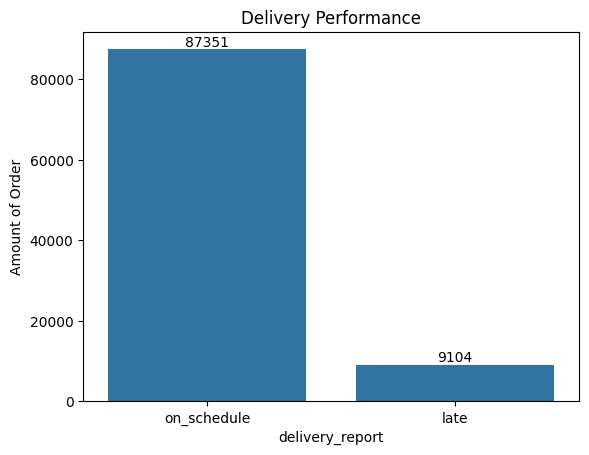

In [122]:
ax = sns.barplot(order_df_copy, x="delivery_report", y='delivery_delta', estimator="count", errorbar=None)
ax.bar_label(ax.containers[0],fontsize=10)

plt.ylabel('Amount of Order')
plt.title('Delivery Performance')

In [ ]:
# # buat nama file
# file_name = 'combined_data.csv'

# # export ke csv
# orderxcustomerxorderitemxproduct_df.to_csv(file_name)

In [ ]:
# # buat nama file
# file_name = 'groupedonetimedata.csv'

# # export ke csv
# orderxcustomerxorderitemxproduct_df_grouped_time_month1.to_csv(file_name)

In [125]:
# # buat dataframe dan nama file
# dataframes = [orderxcustomerxorderitemxproduct_df_drop_5datetime, orderxcustomerxorderitemxproduct_df,orderxcustomerxorderitemxproduct_df_copy_3, order_df_copy]
# file_names = ['group1.csv', 'group2.csv', 'group3.csv', 'group4.csv']

# # export ke excel
# for df, file_name in zip(dataframes, file_names):
#     df.to_csv(file_name, index=False)


**Insight:**
- Ada beberapa pengiriman yang telat dari target perkiraan
- Revenue tertinggi terdapat pada state Sao Paulo

## Visualization & Explanatory Analysis

### Pertanyaan 1:

- Kategori produk apa yang paling banyak dan paling sedikit terjual ?

### Pertanyaan 2:

- bagaimana performa penjualan di setiap kota atau negara bagian dalam 3 tahun terakhir ?

## Conclusion

- kategori produk yang paling banyak terjual adalah Beleza_saude sedangkan yang paling sedikit terjual adalah seguros_e_servicos
- kota dan negara bagian dengan performa penjualan terbaik berada di Sao Paulo 